In [1]:
#Author : Priyanka Singh
#Topic : Advanced Linear Regression Assignment - House Pricing

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')


In [3]:
#Setting the dataset to show all values of rows, columns etc
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
#Loading and reading the dataset
house_df = pd.read_csv('train.csv')
house_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#Checking column information and dimension as well
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 81 columns and 1460 rows

After reading the data, we found that certain columns namely -

Alley -  NA : No Alley Access
BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - NA : No Basement
FireplaceQu - NA : No Fireplace
GarageType, GarageFinish, GarageQual, GarageCond - NA : No Garage
PoolQC - NA : No Pool
Fence - NA : No Fence
MiscFeature - NA : None

Hence, we will classify this as none before finding missing values. We will read the csv file again and set the parameter 'keep_default_na'= False

In [6]:
house_df = pd.read_csv('train.csv', keep_default_na = False)
house_df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [7]:
#Replacing NA with None
house_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
      'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = house_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 
      'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")


In [8]:
#QC Step check for Alley parameter -  the changes are reflecting
house_df['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [9]:
#Checking on the overall data whether the changes are done on the desired columns or not -  The changes are reflecting
house_df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [10]:
#Checking info to do a final validation of NA imputation
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

While checking the dataset in sync with its datatype with proper understanding using data dictionary, we want to check whether any change needs to be done or not. 
It was found that, columns [MSSubClass, OverallQual, OverallCond] needs to be converted to Object type. And [LotFrontage , MasVnrArea] needs to be converted to numeric type.

In [11]:
#Convert 3 columns to object type and 2 to numeric type
house_df[['MSSubClass','OverallQual','OverallCond']] = house_df[['MSSubClass','OverallQual','OverallCond']].astype(object)
house_df['LotFrontage'] = pd.to_numeric(house_df['LotFrontage'], errors='coerce')
house_df['MasVnrArea'] = pd.to_numeric(house_df['MasVnrArea'], errors='coerce')

In [12]:
#QC Step to check whether changes are made or not - The changes are reflecting
house_df[['MSSubClass','OverallQual','OverallCond','LotFrontage','MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [13]:
#Checking the statistical function using descibe
house_df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

The mean of certain variables are very far off with respect to the median values, so they have skewed distributions

In [14]:
#Checking missing values
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Columns - 'LotFrontage' and 'MasVnrArea' have missing values and we will do the missing value treatment

<Axes: xlabel='SalePrice', ylabel='Density'>

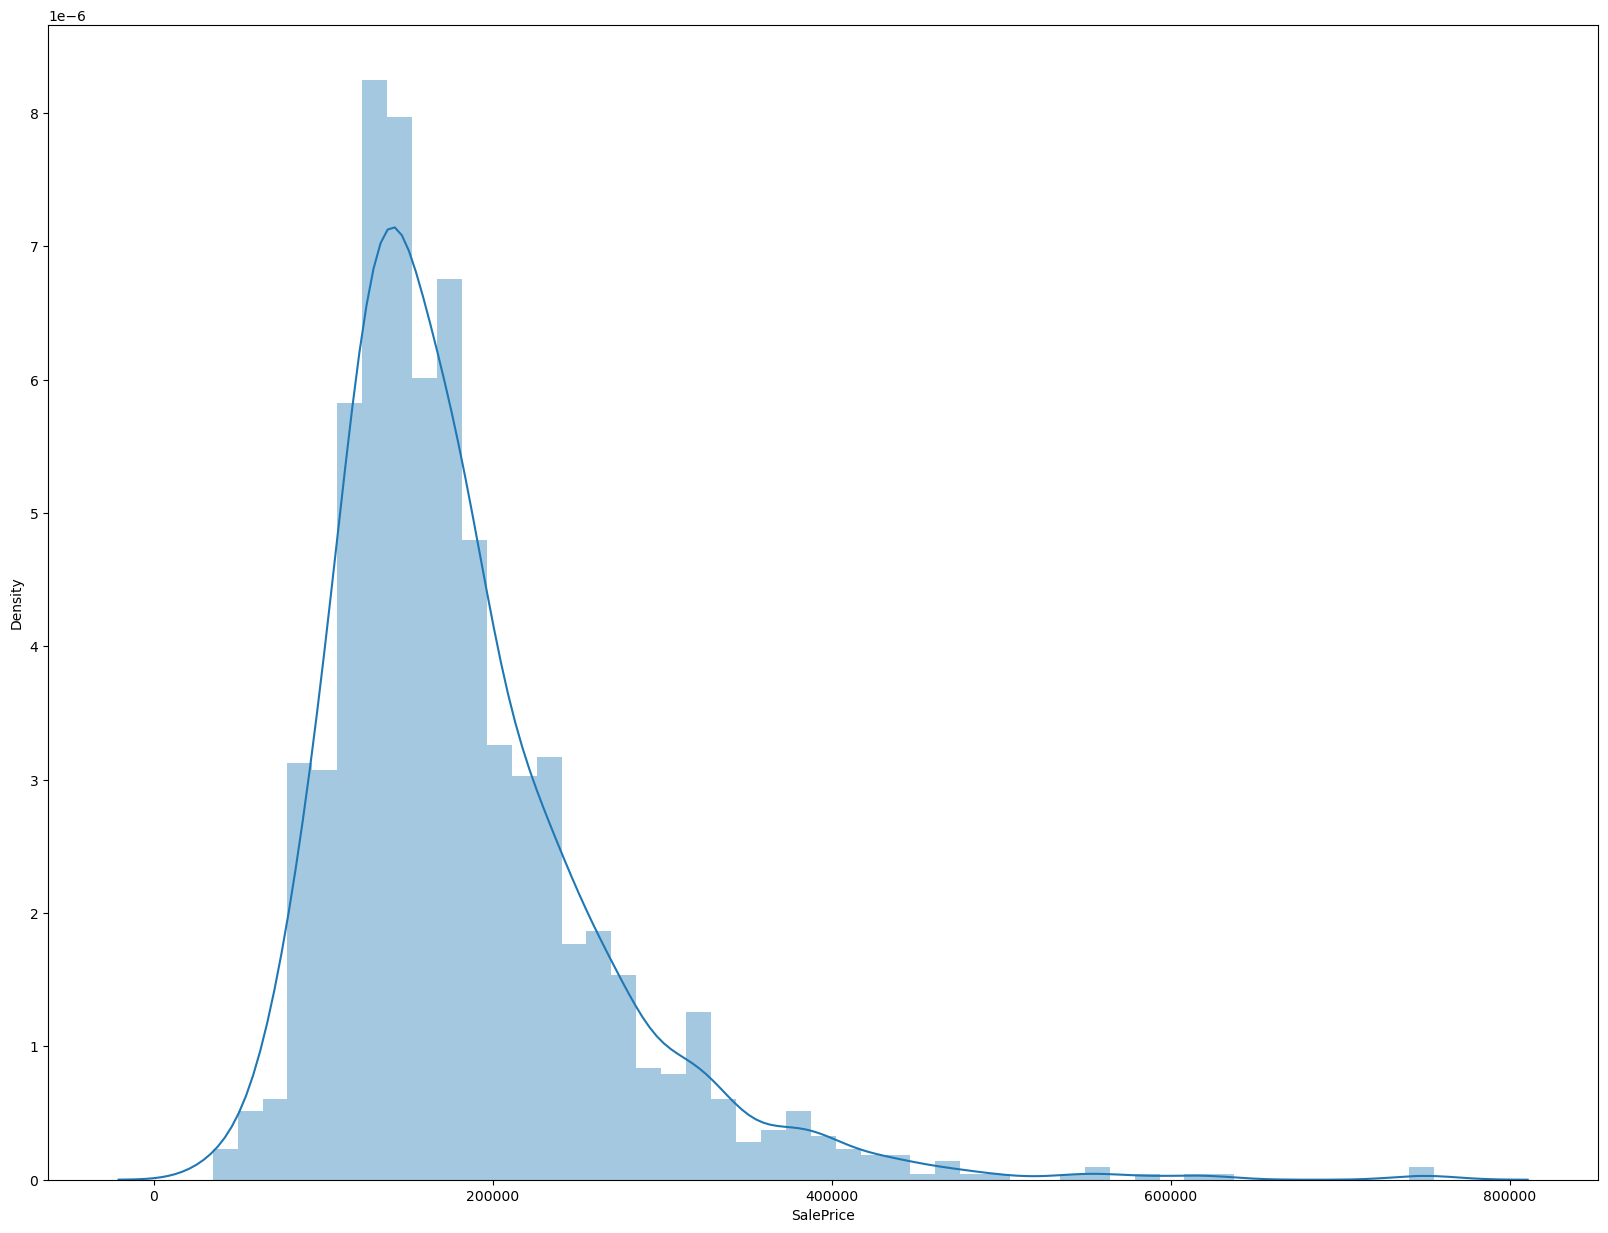

In [15]:
#Univariate Analysis
plt.figure(figsize=[20,15])
sns.distplot(house_df['SalePrice'])

In [16]:
#Checking skewness of Target Variable
house_df['SalePrice'].skew()

1.8828757597682129

The skewness is greater than 1 which means it is highly skewed

In [17]:
#Checking kurtosis of Target Variable
house_df['SalePrice'].kurt()

6.536281860064529

Kurtosis is greater than 1, hence distribution is highly peaked

In [18]:
#Carrying out log transformation of target variable
house_df['SalePrice'] = np.log(house_df['SalePrice'])

In [19]:
#Checking whether the value gets corrected or not
print(house_df['SalePrice'].skew())
print(house_df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


The skewness and kurtosis is less than 1 now

<Axes: xlabel='SalePrice', ylabel='Density'>

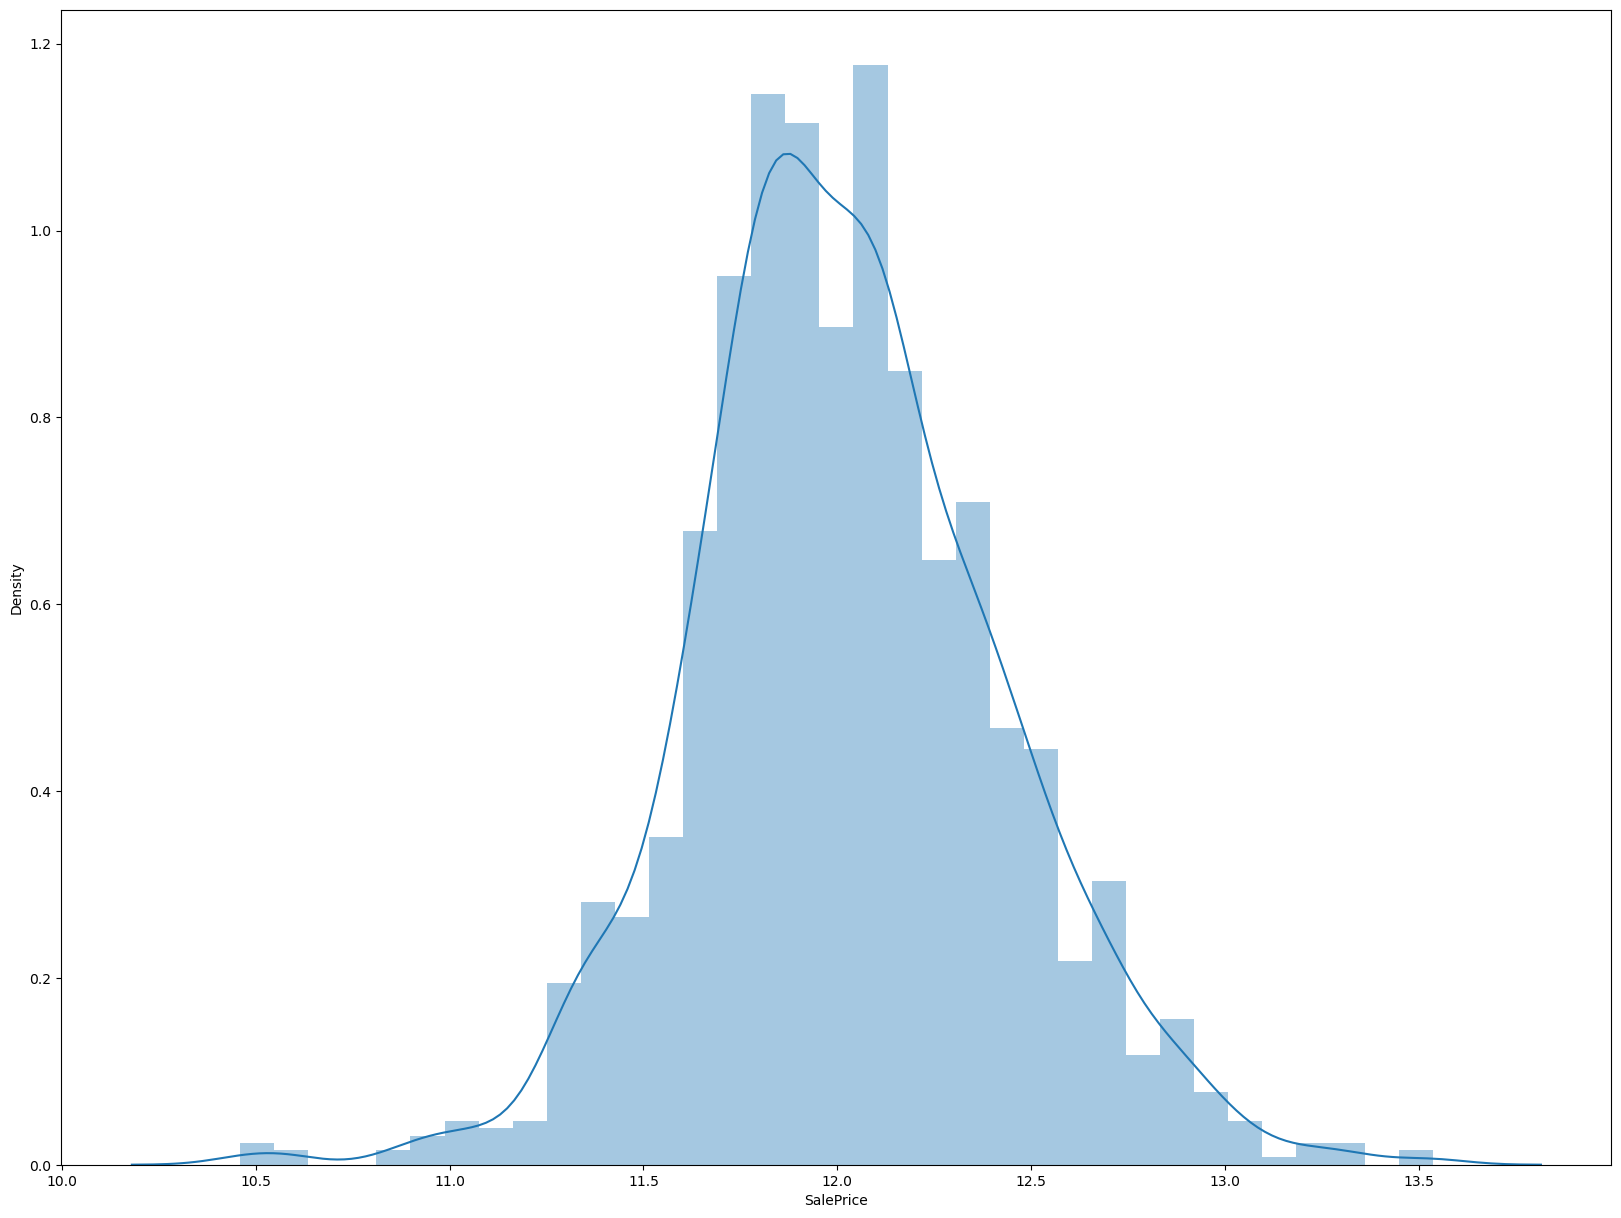

In [20]:
#Checking the plot of transformed target variable
plt.figure(figsize = [20,15])
sns.distplot(house_df['SalePrice'])

The target variable has normal distribution

In [21]:
#Dividing the dataset into numerical and categorical columns for ease of doing EDA on that
house_df_num = house_df.select_dtypes(include = ['int64','float64'])
house_df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [22]:
house_df_cat = house_df.select_dtypes(include = ['object'])
house_df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

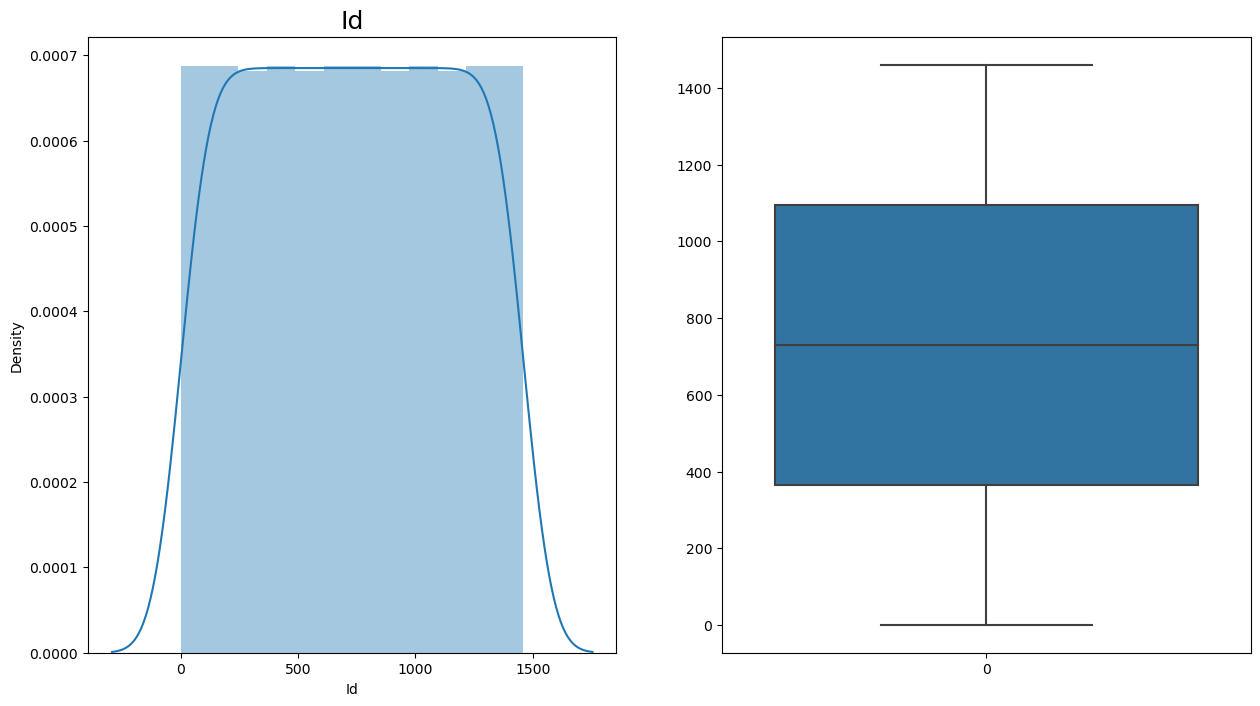

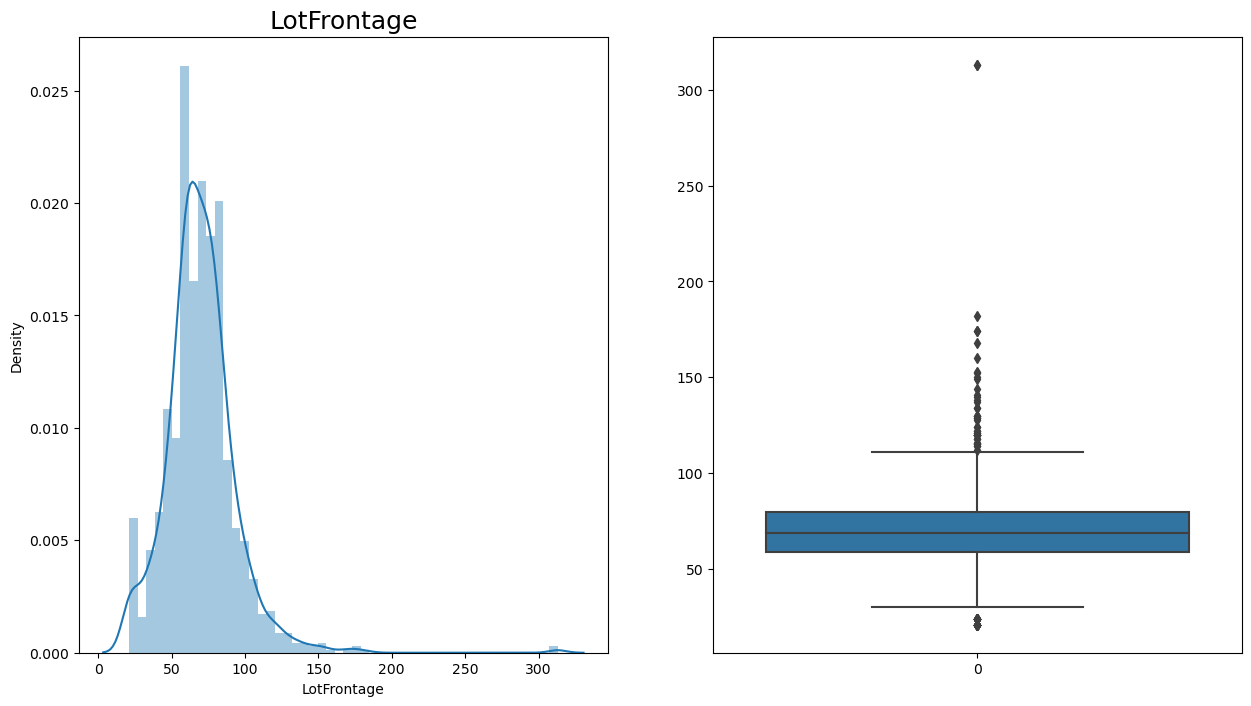

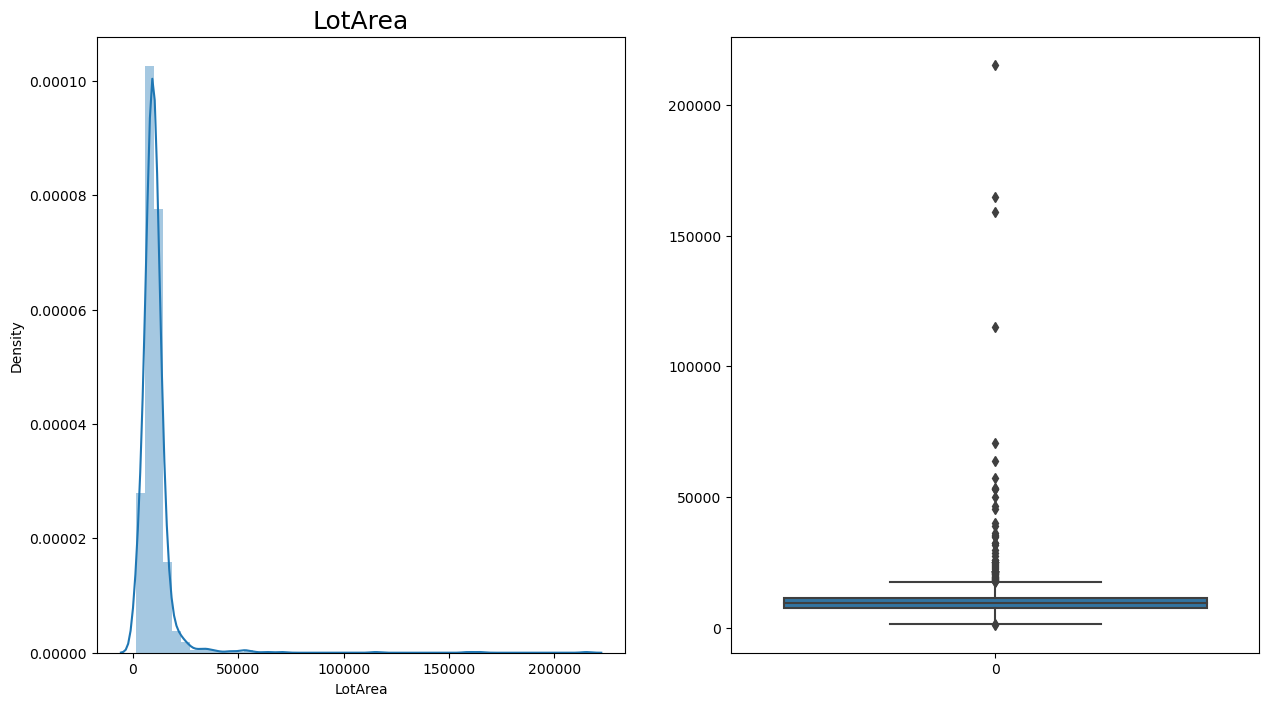

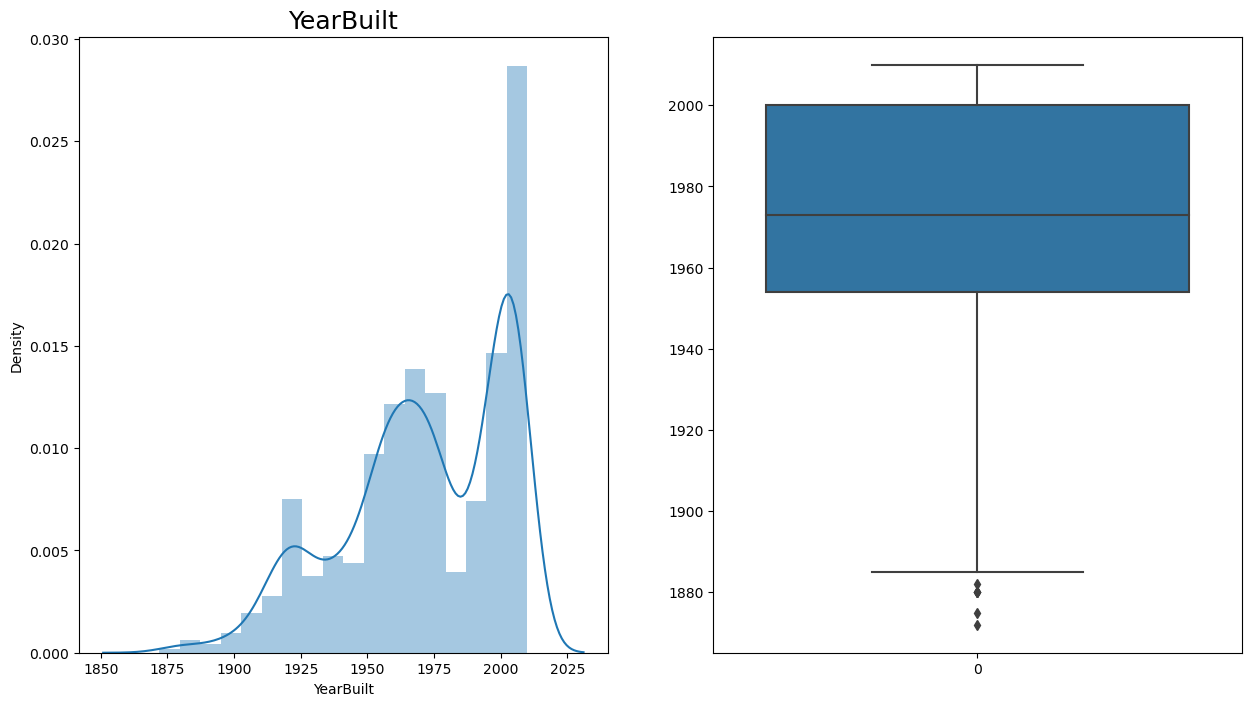

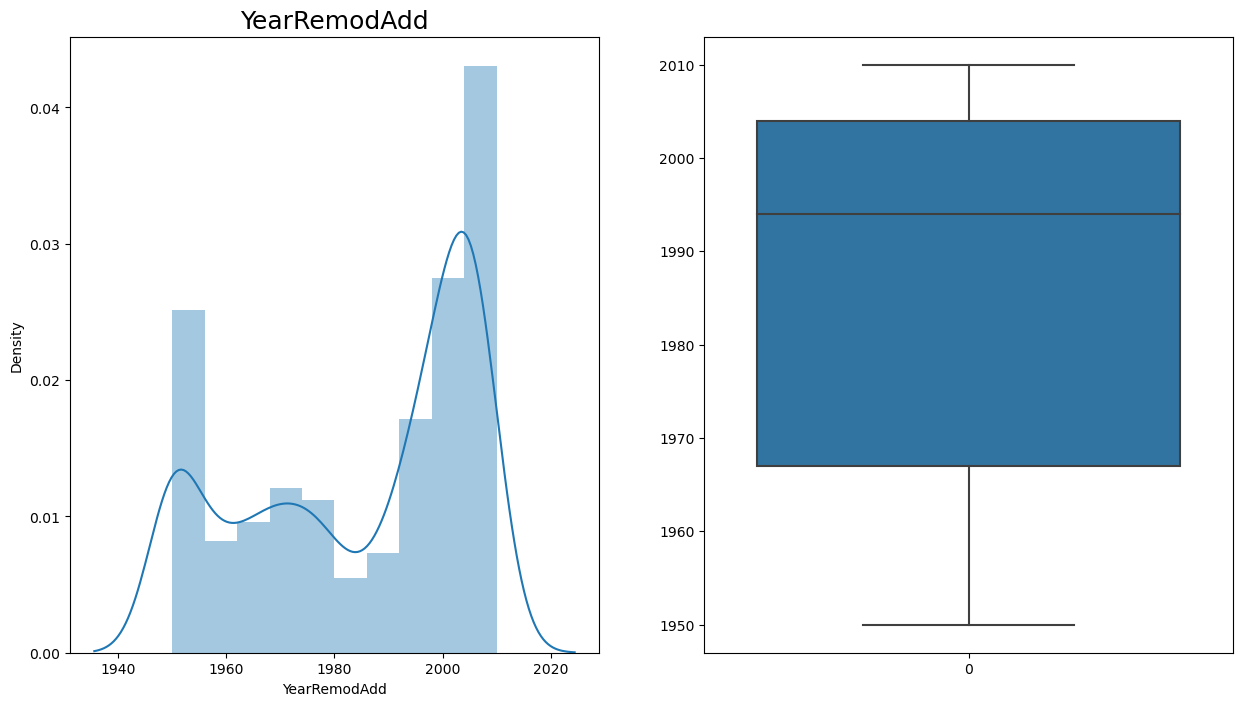

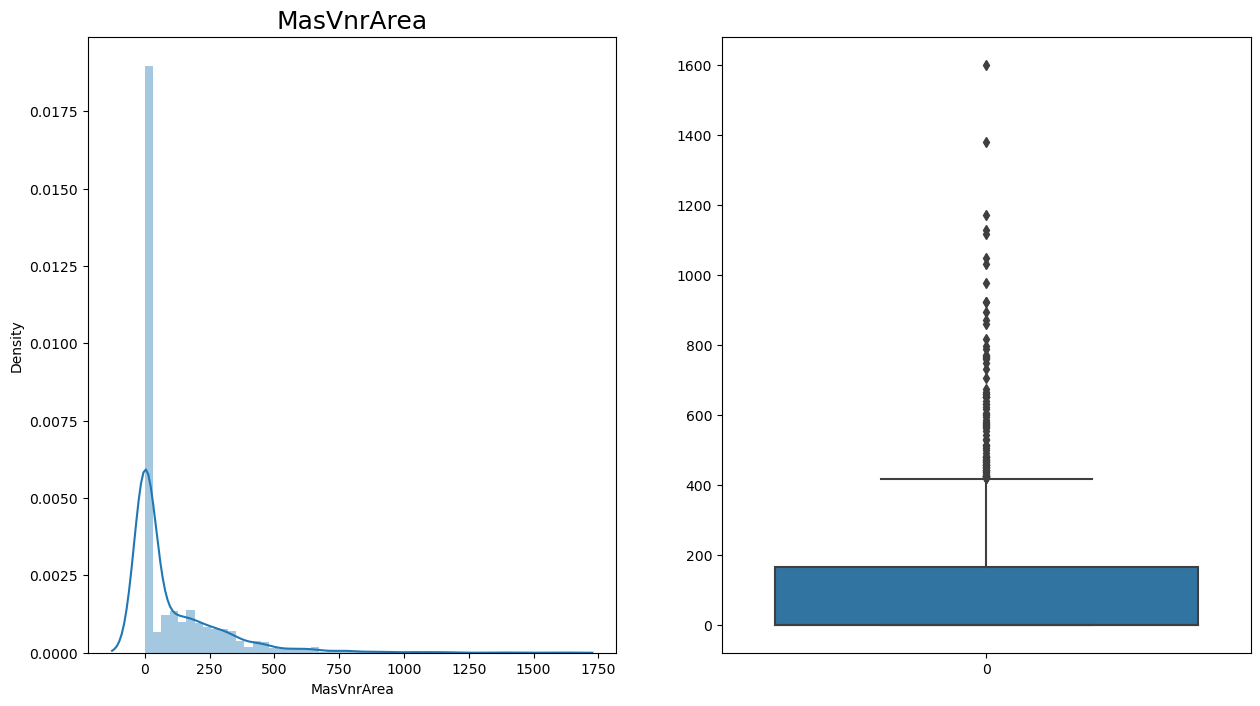

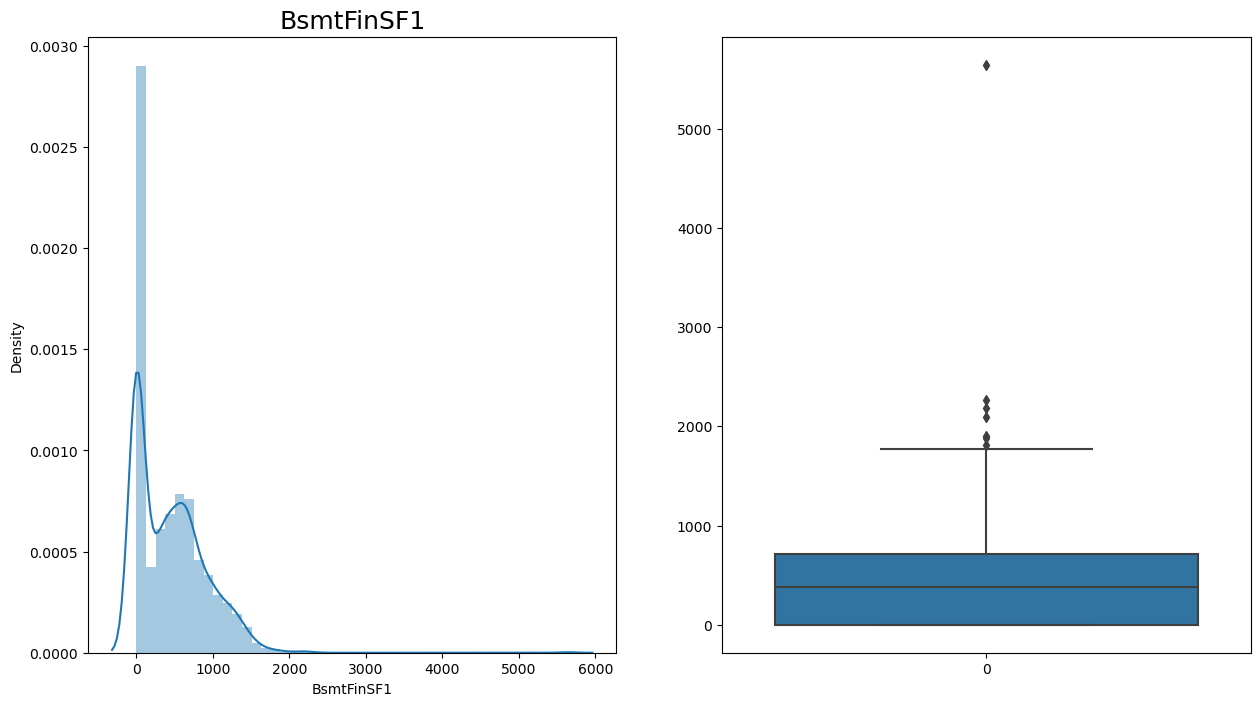

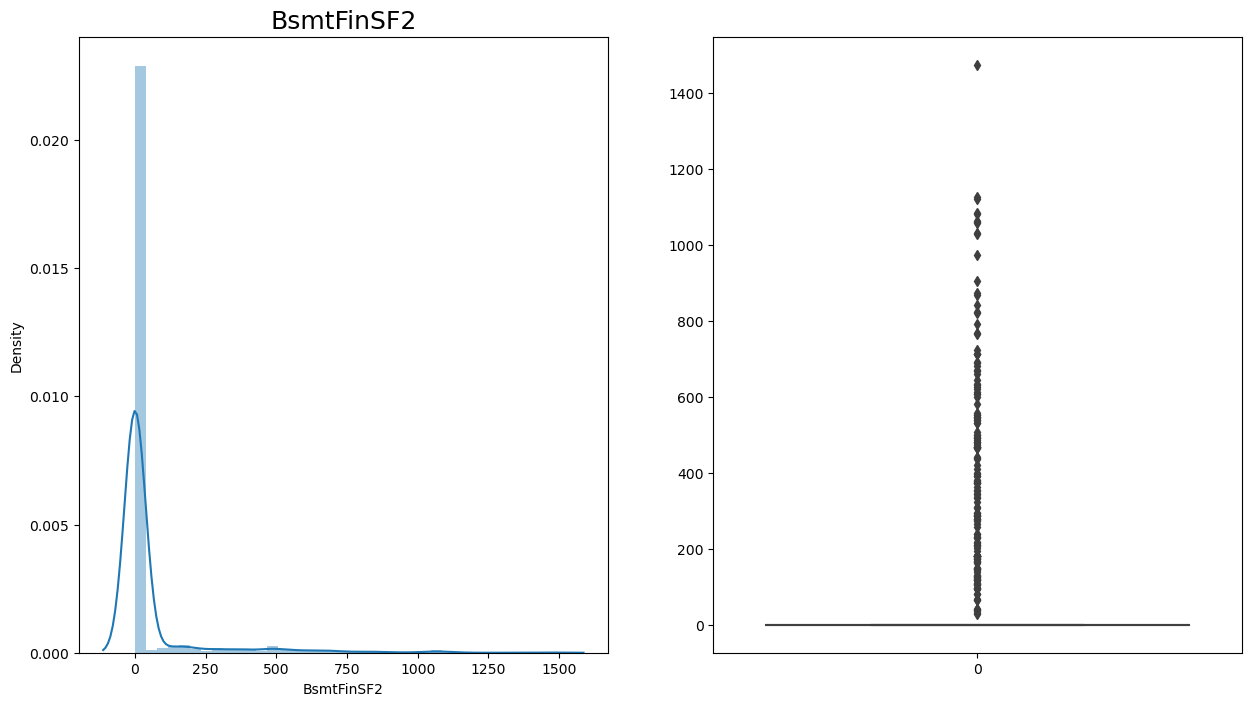

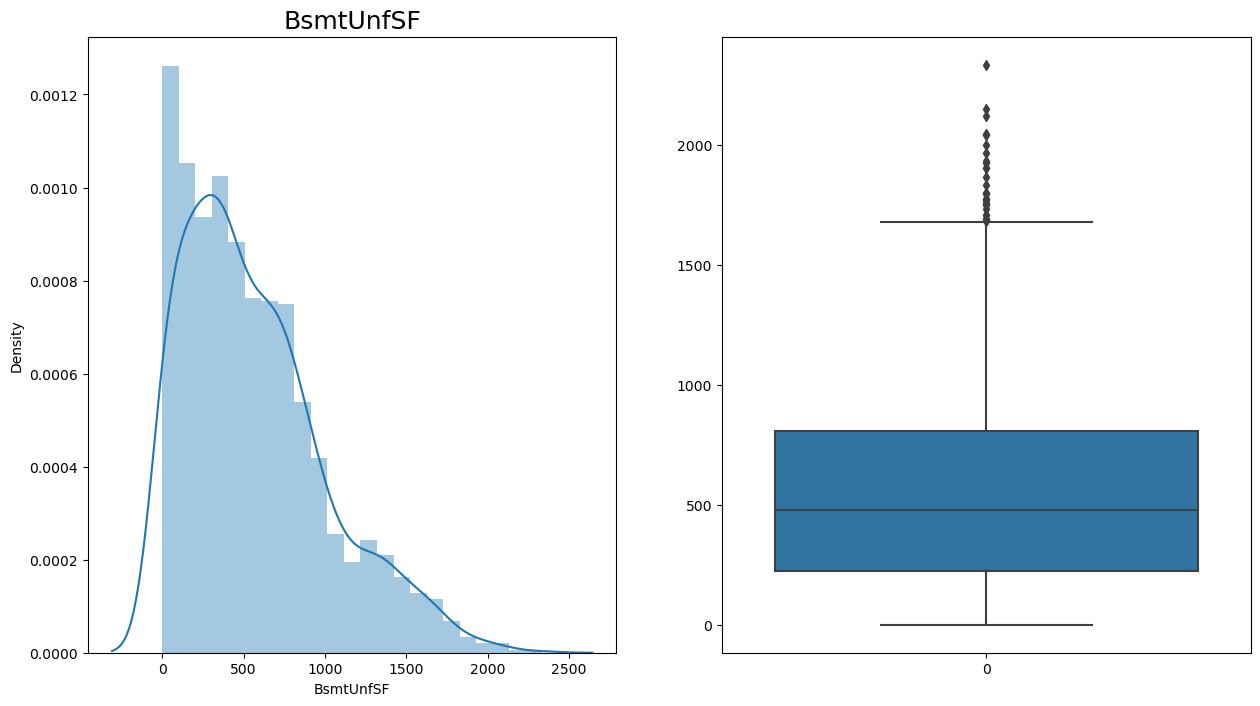

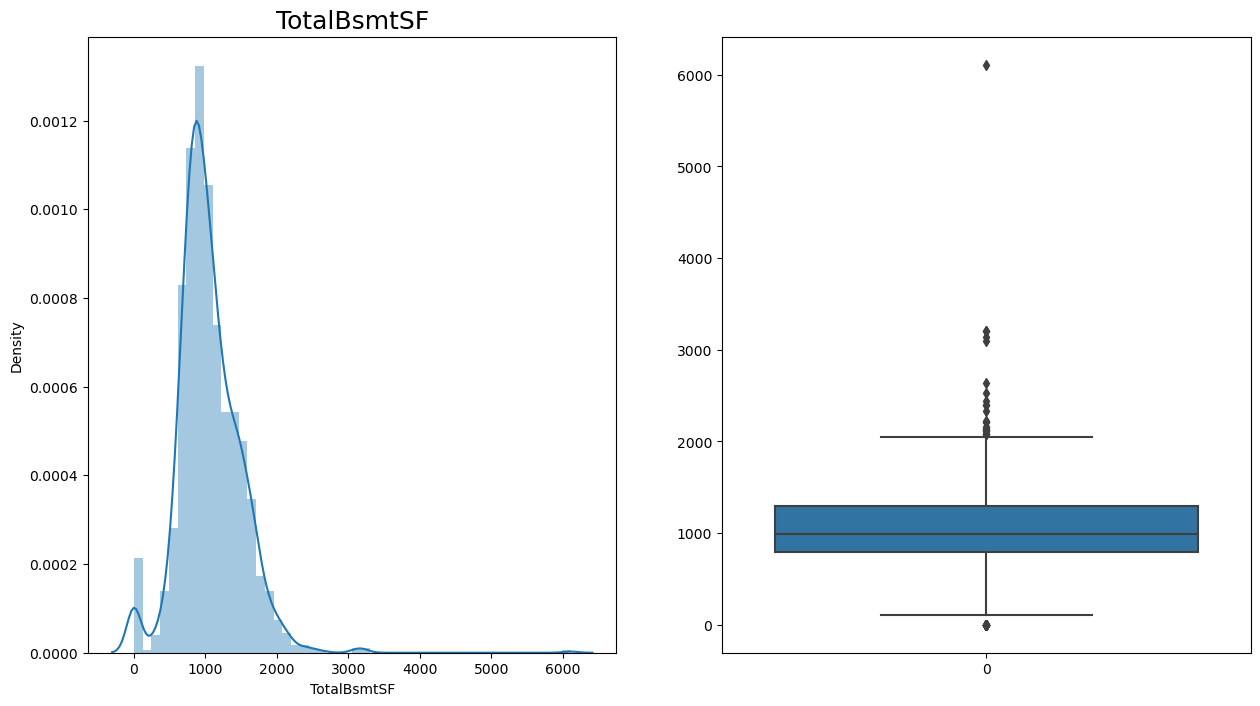

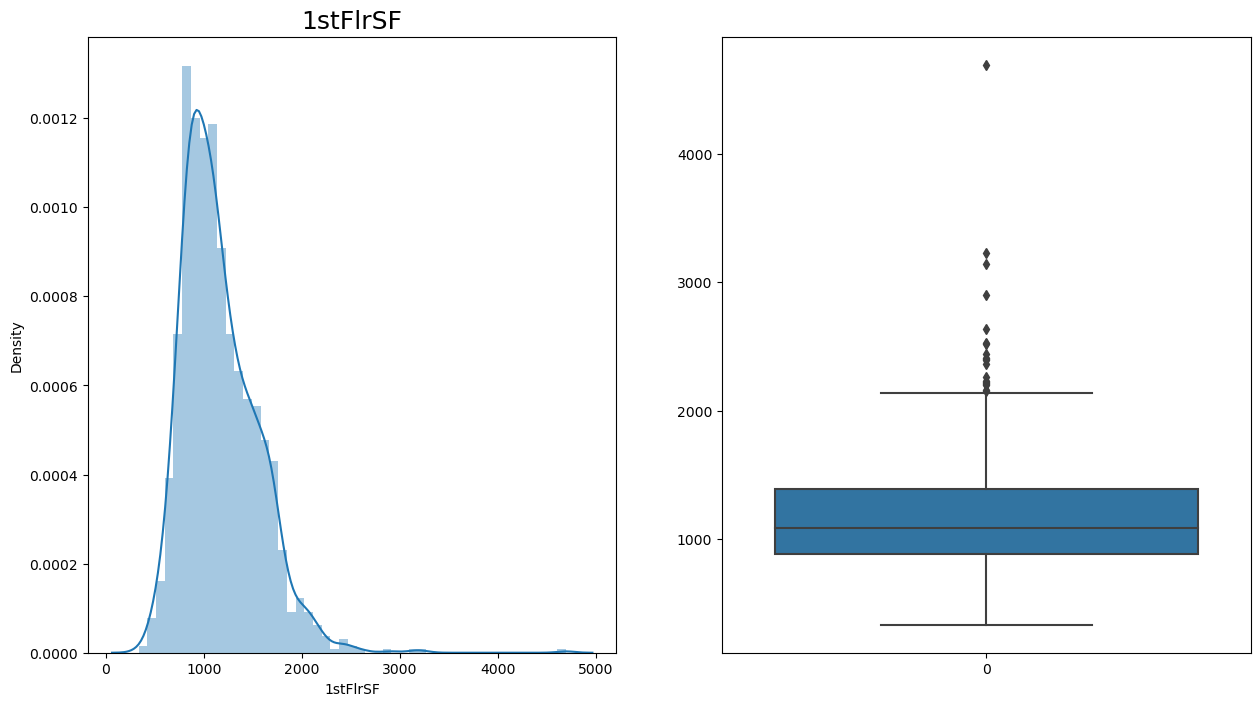

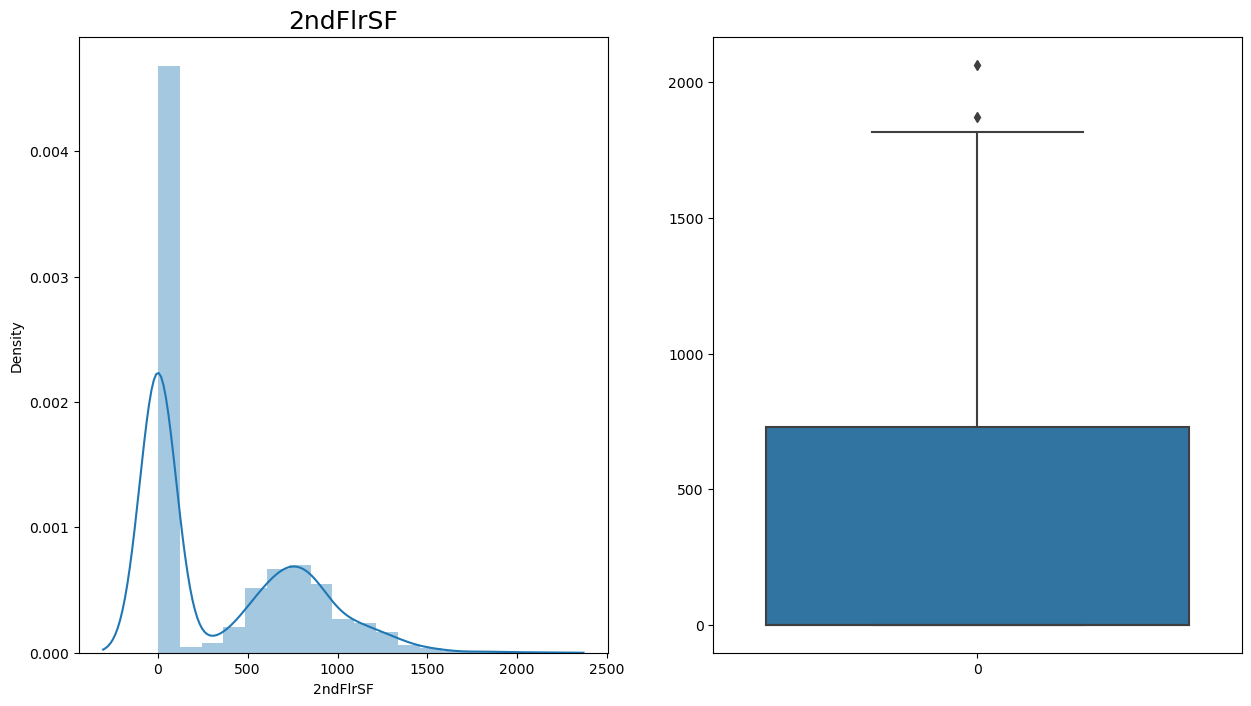

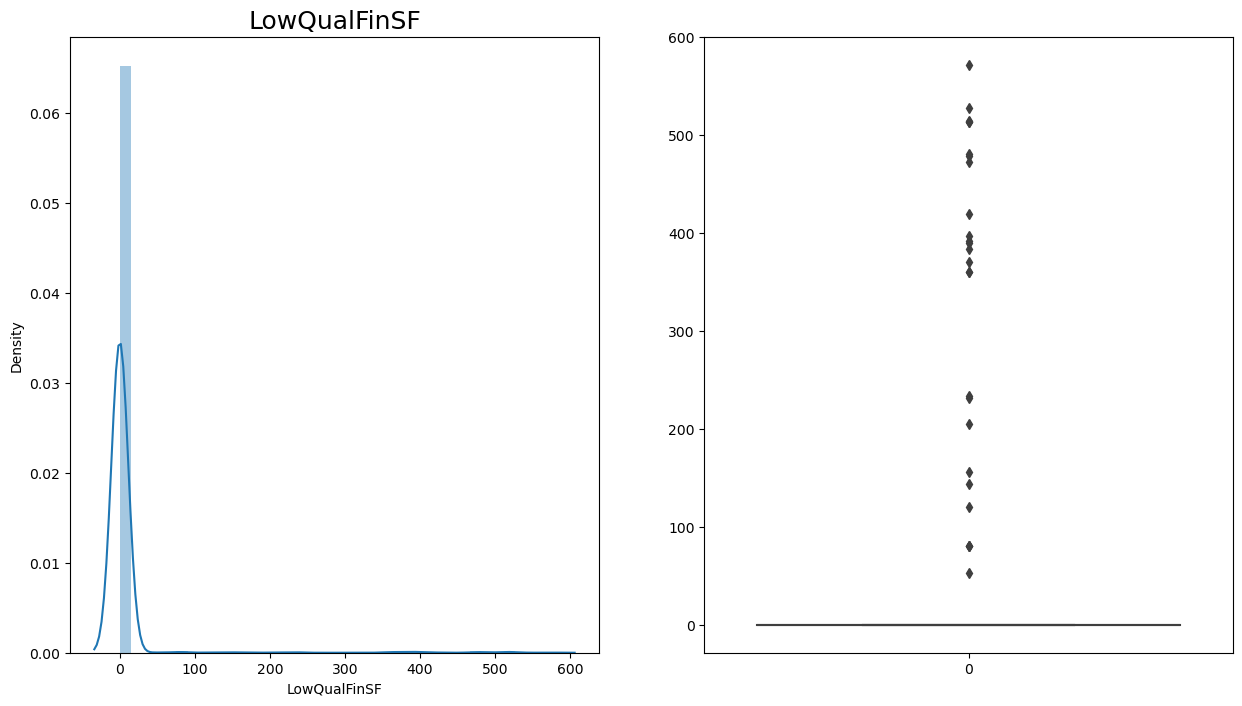

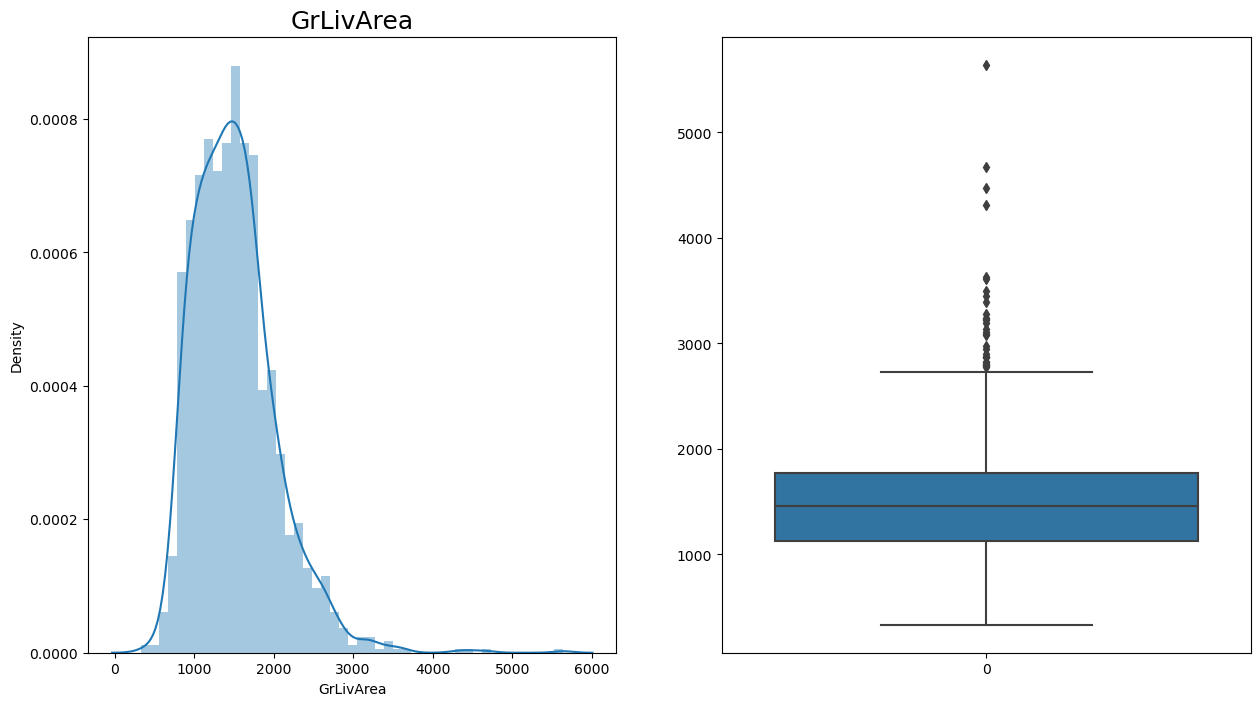

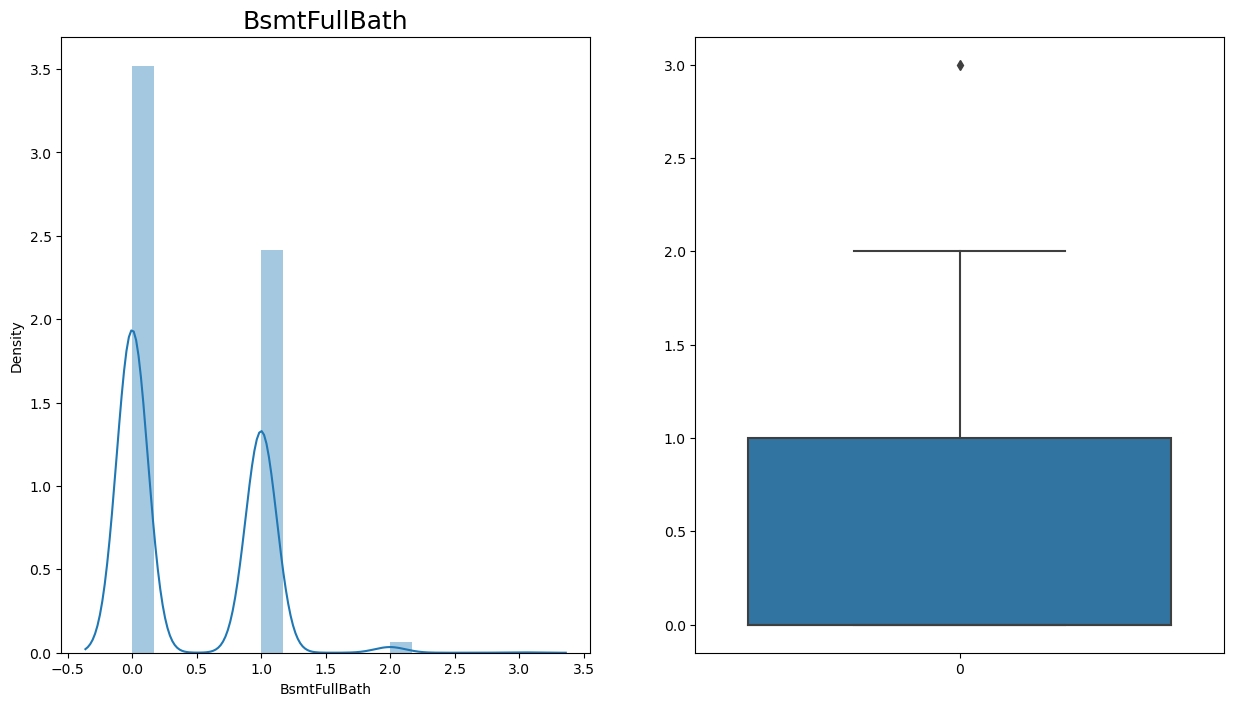

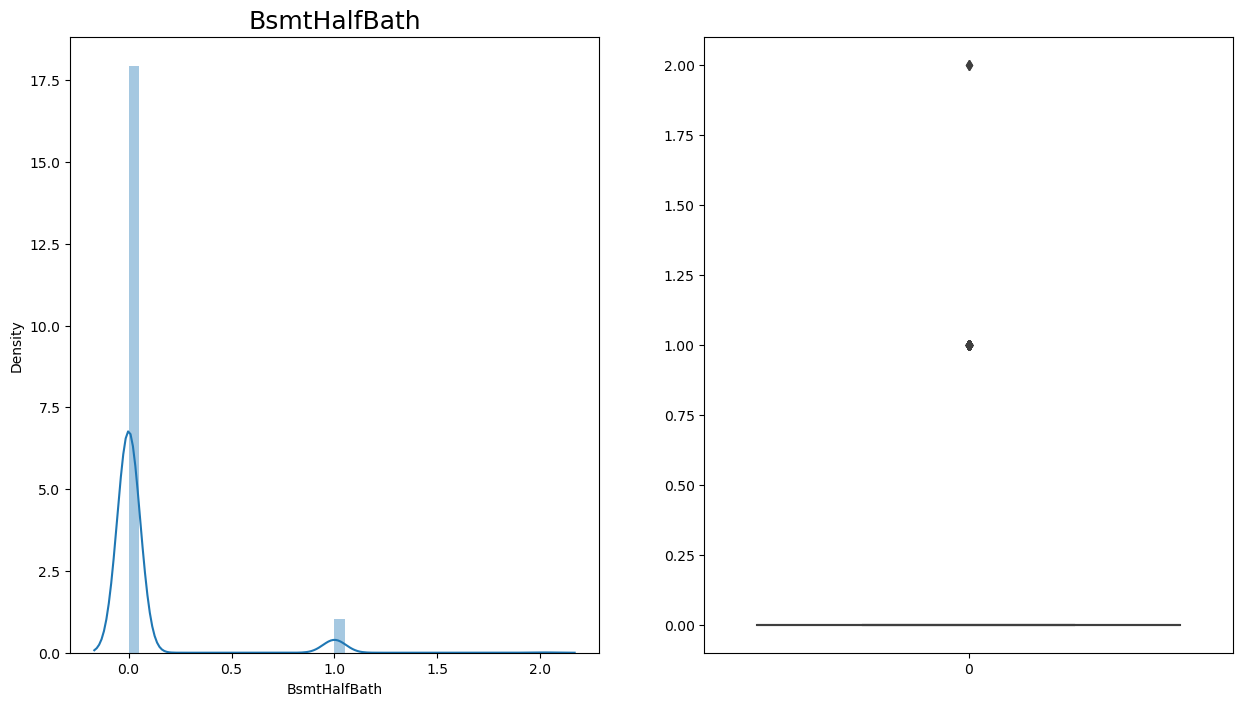

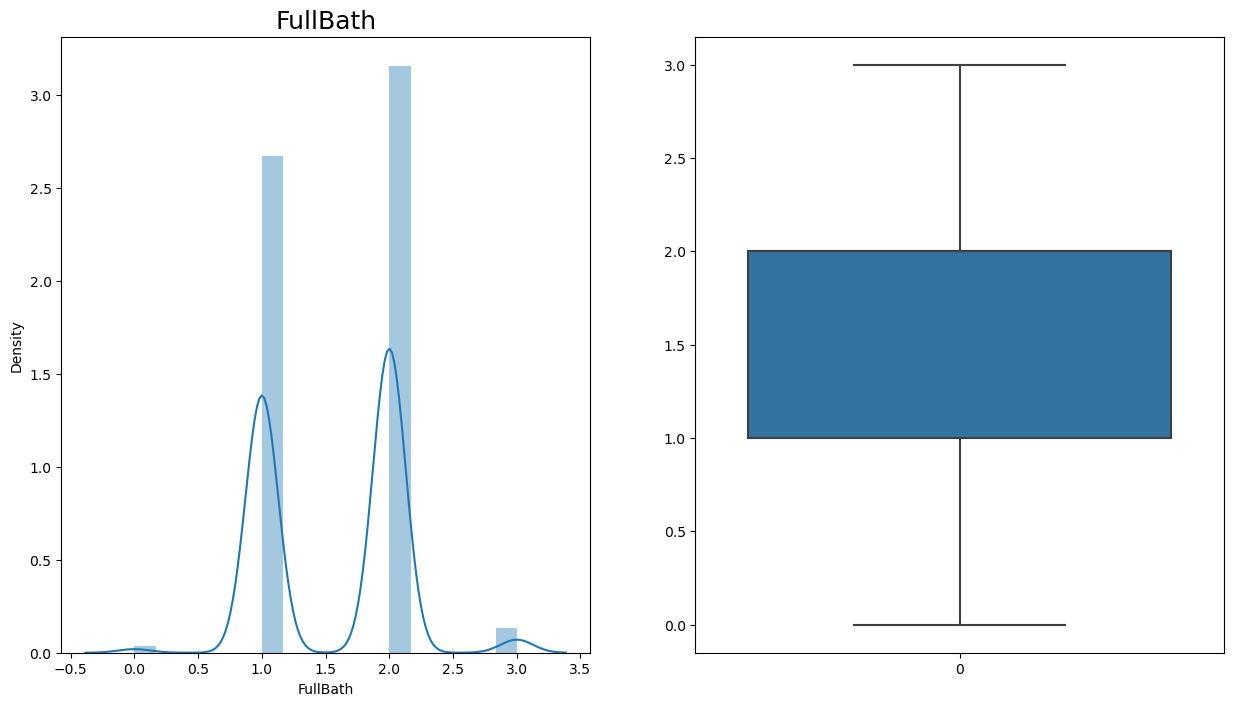

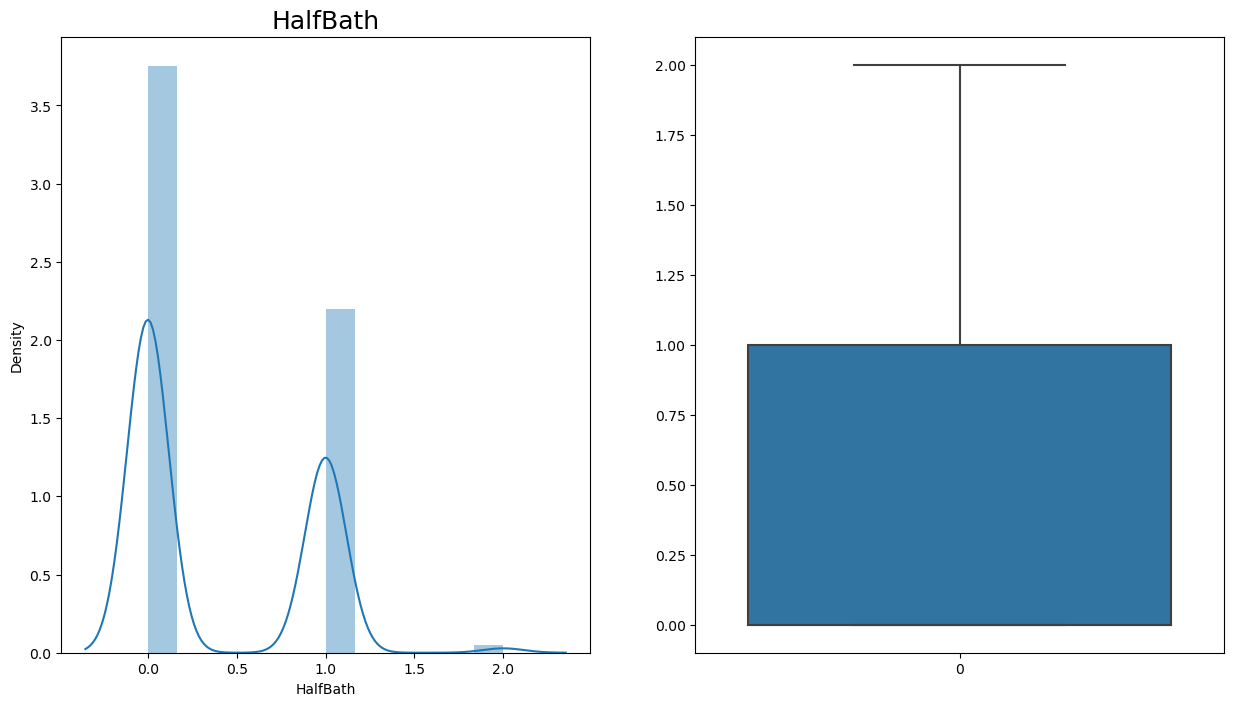

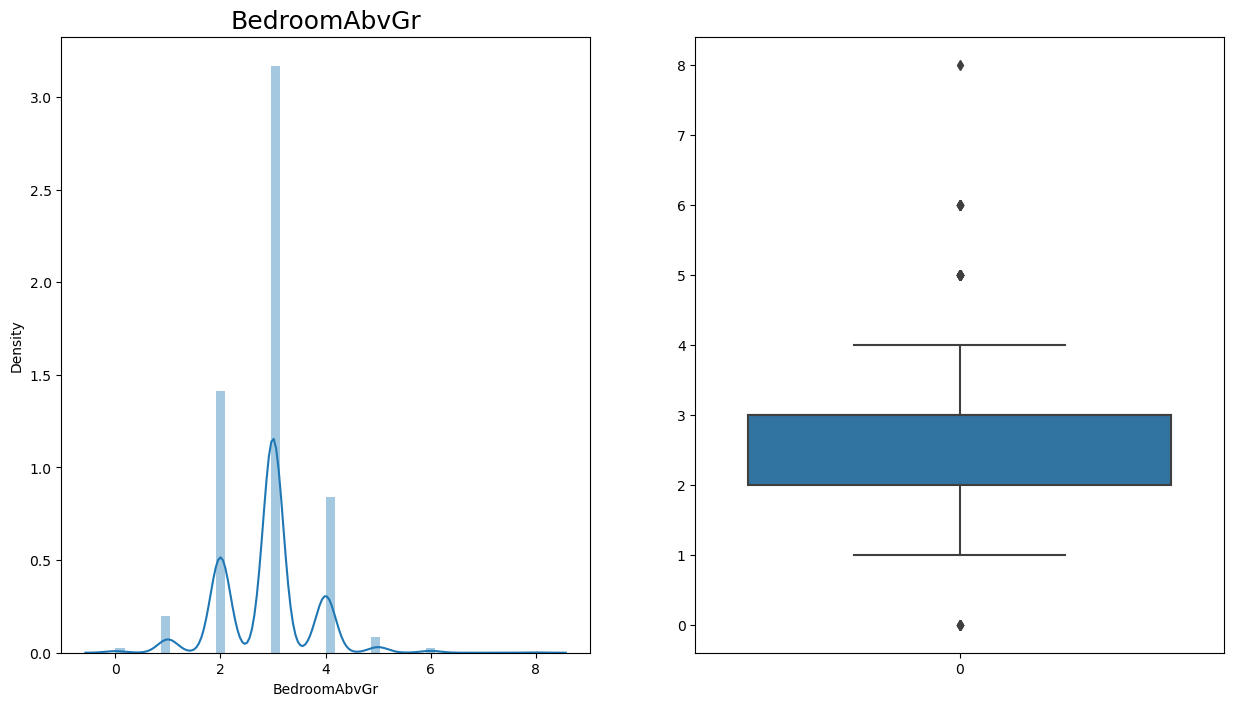

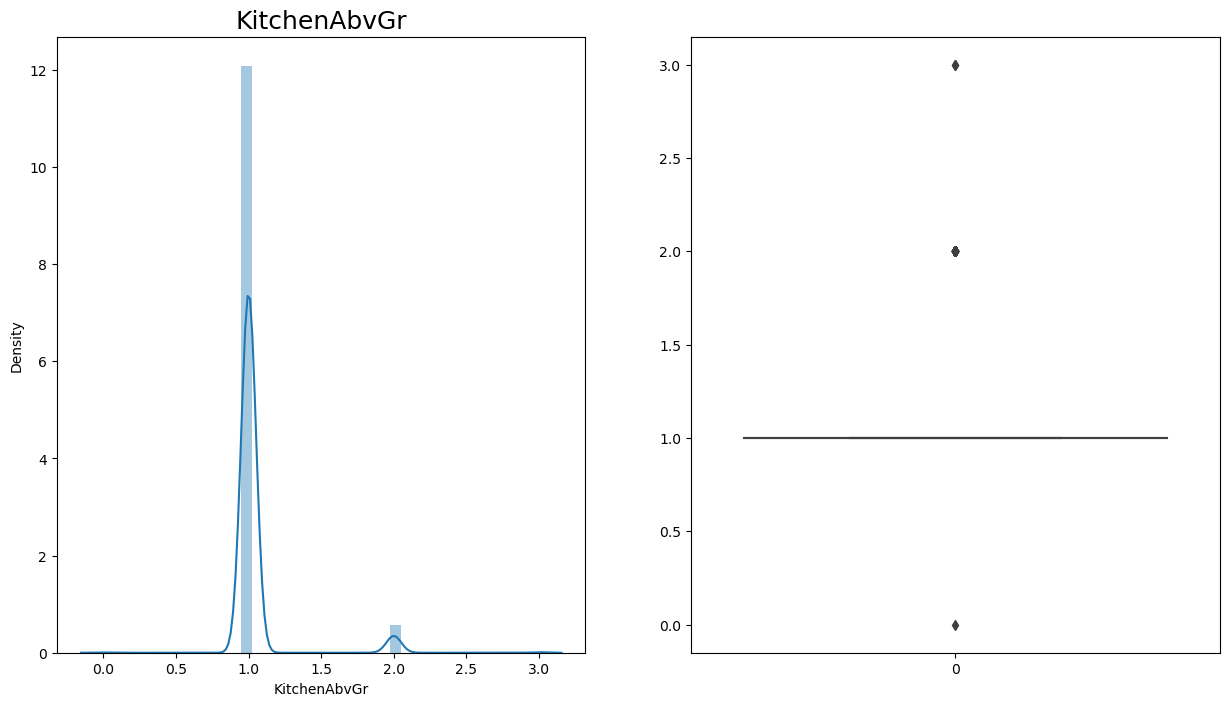

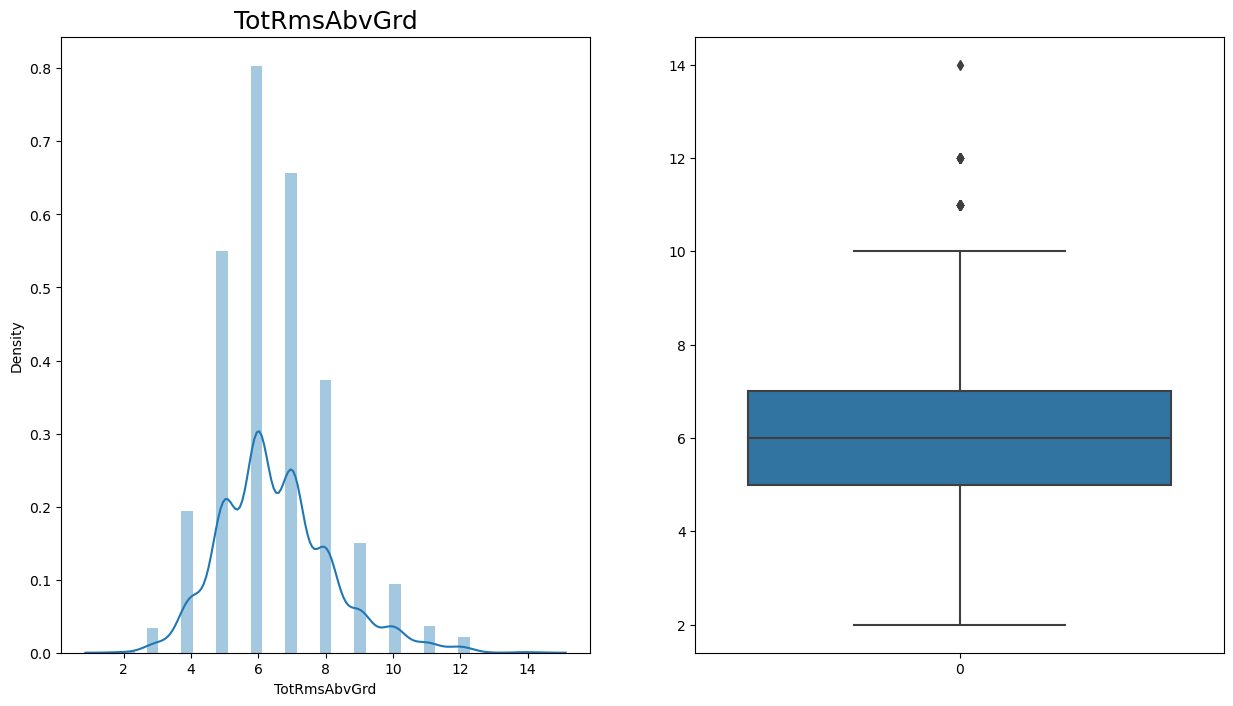

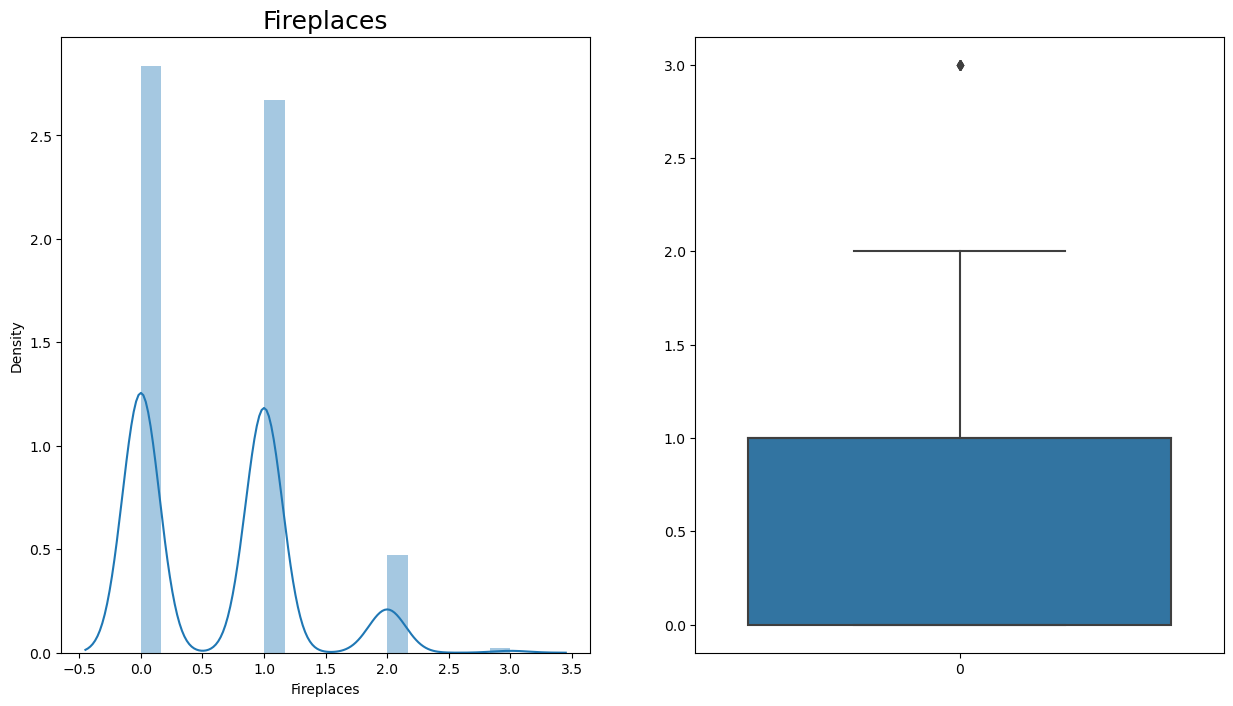

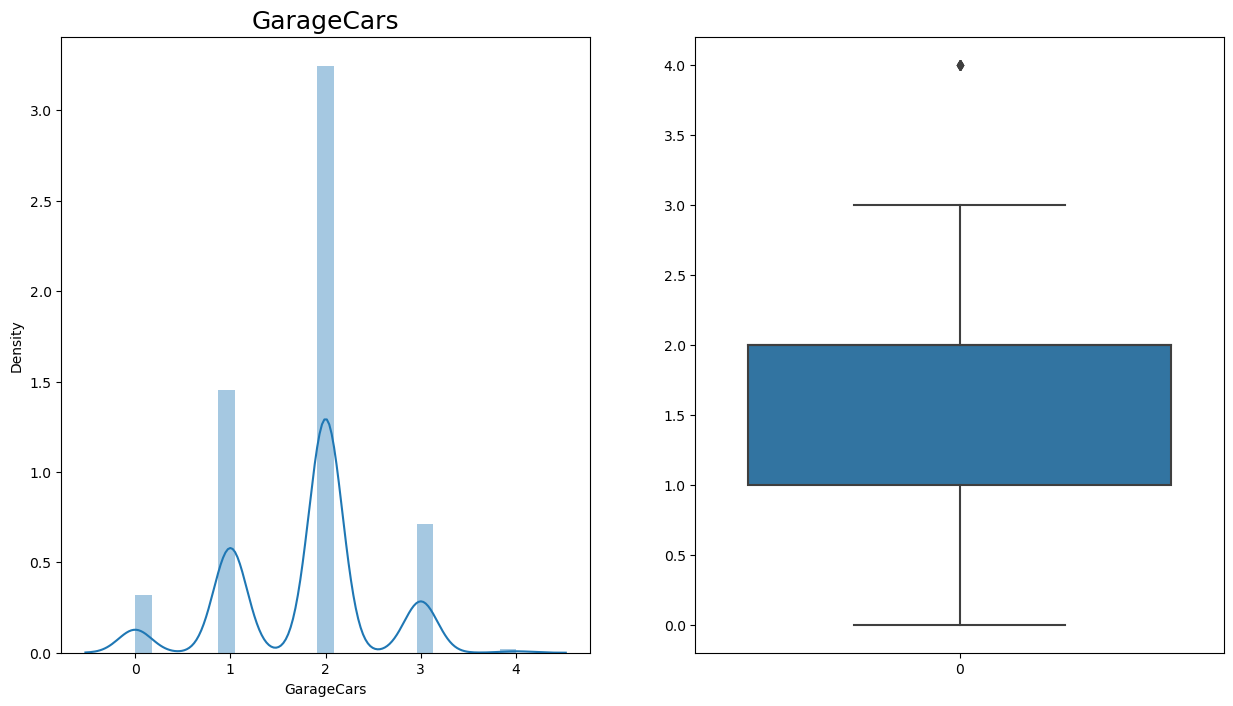

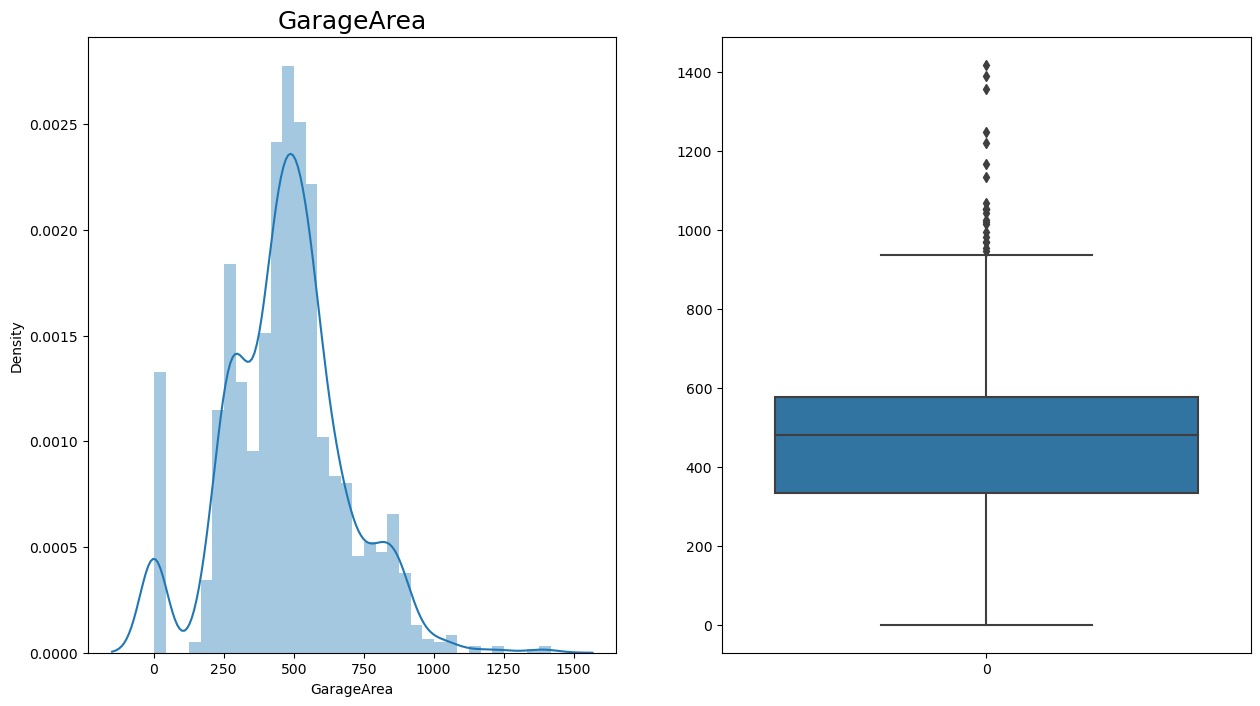

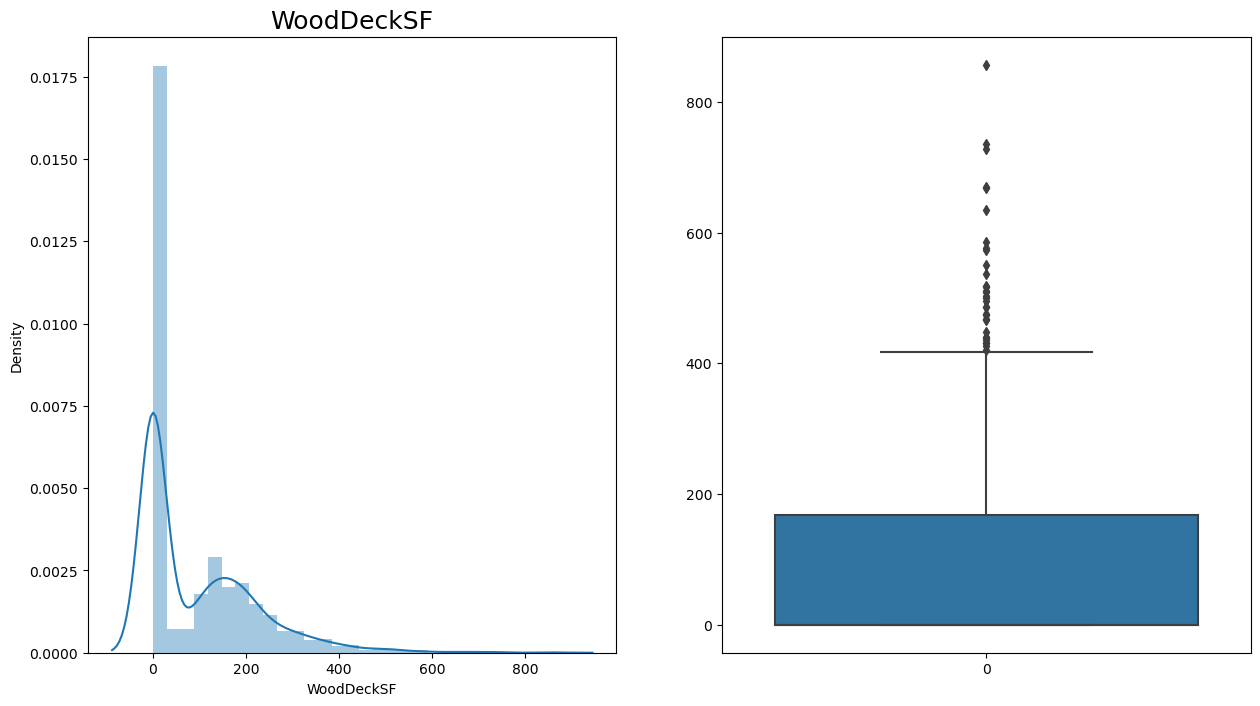

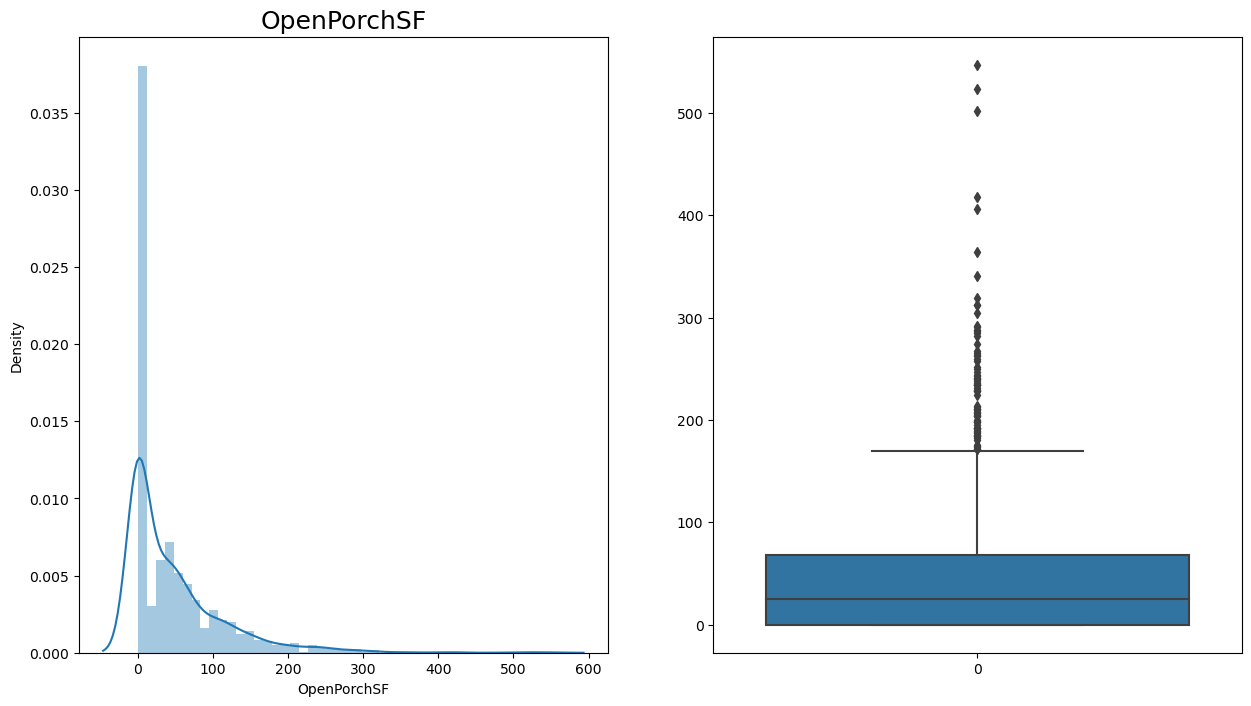

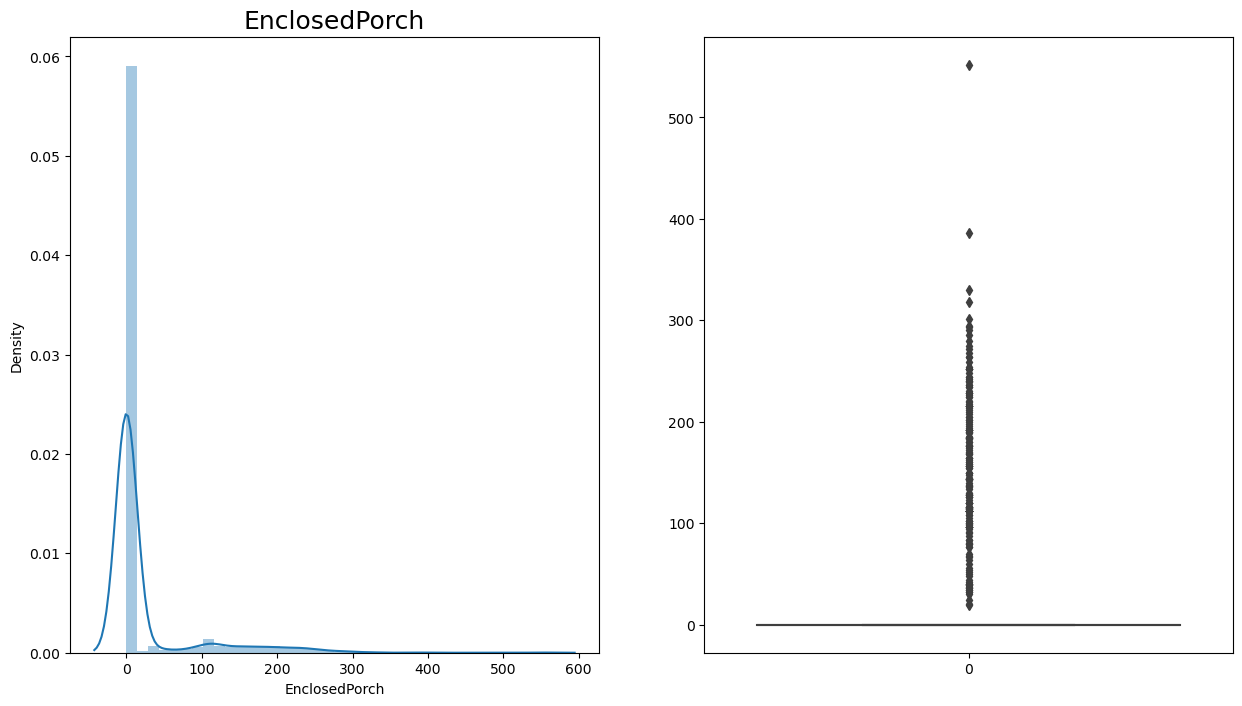

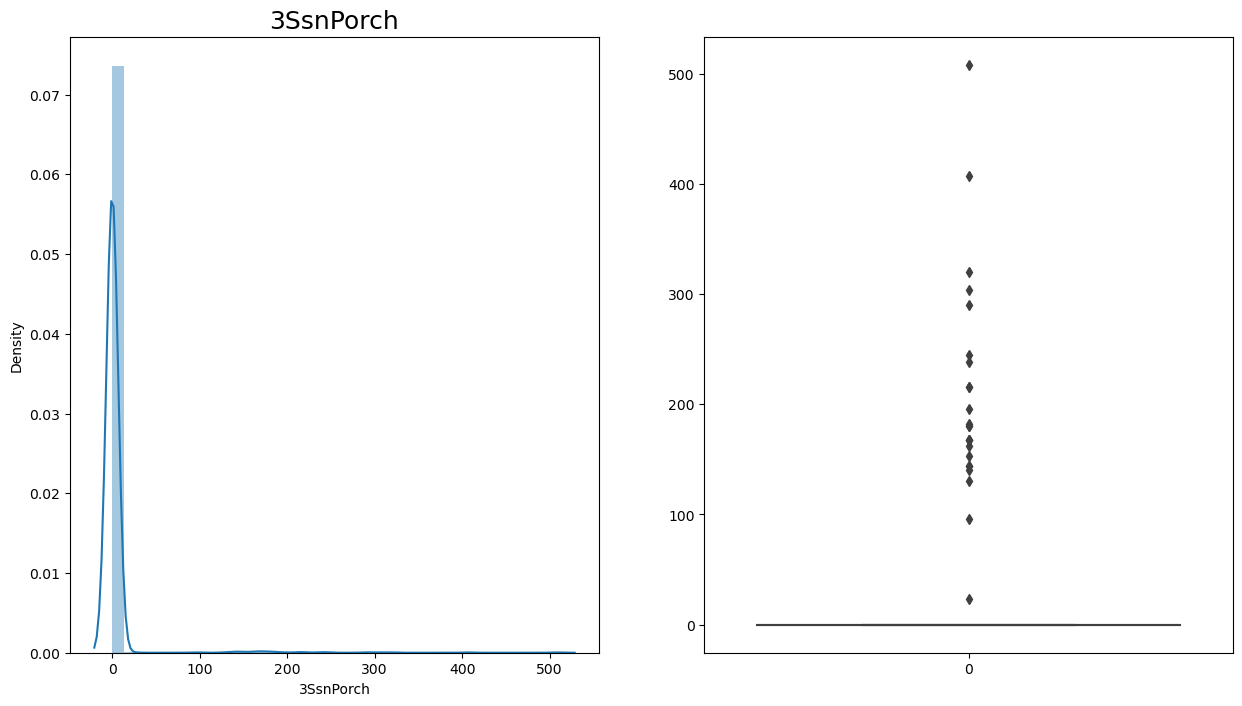

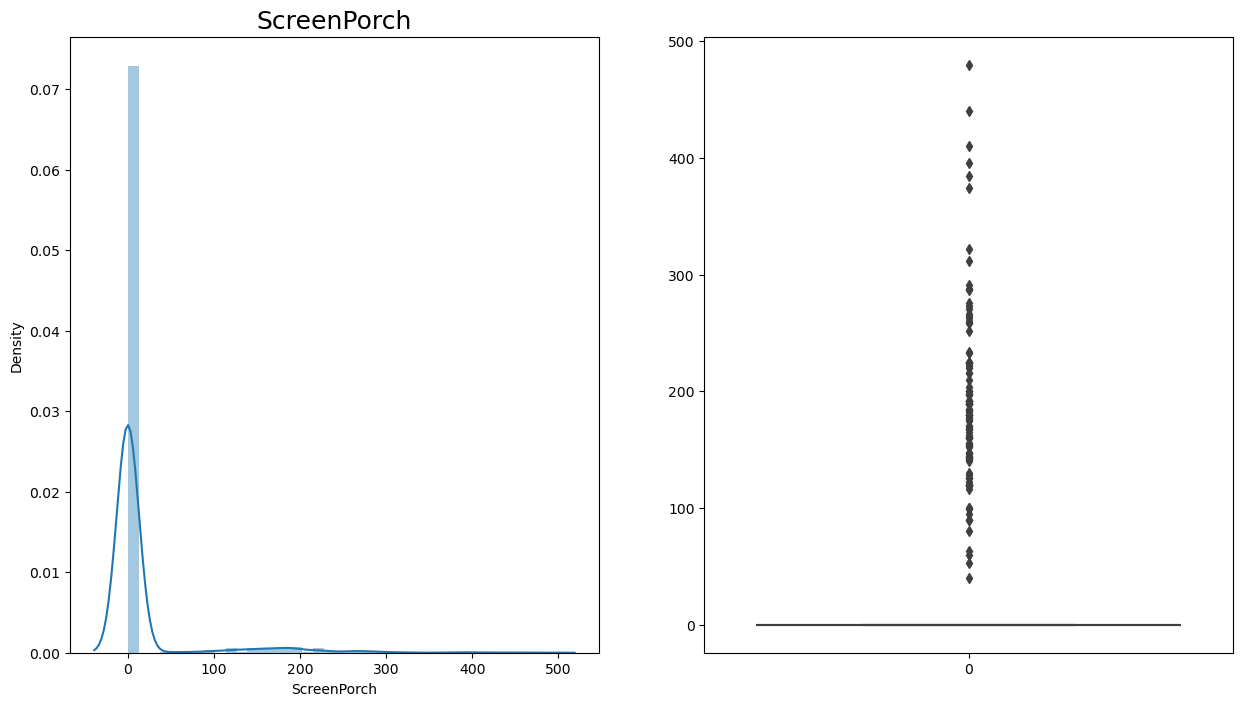

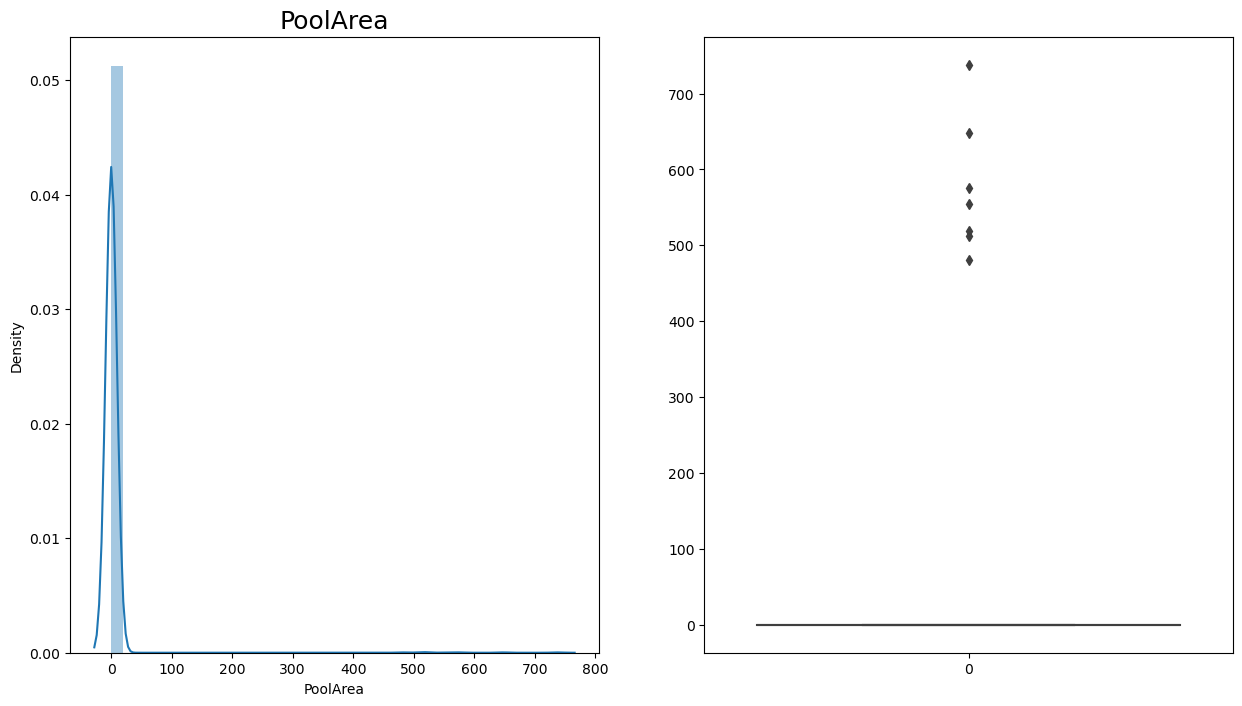

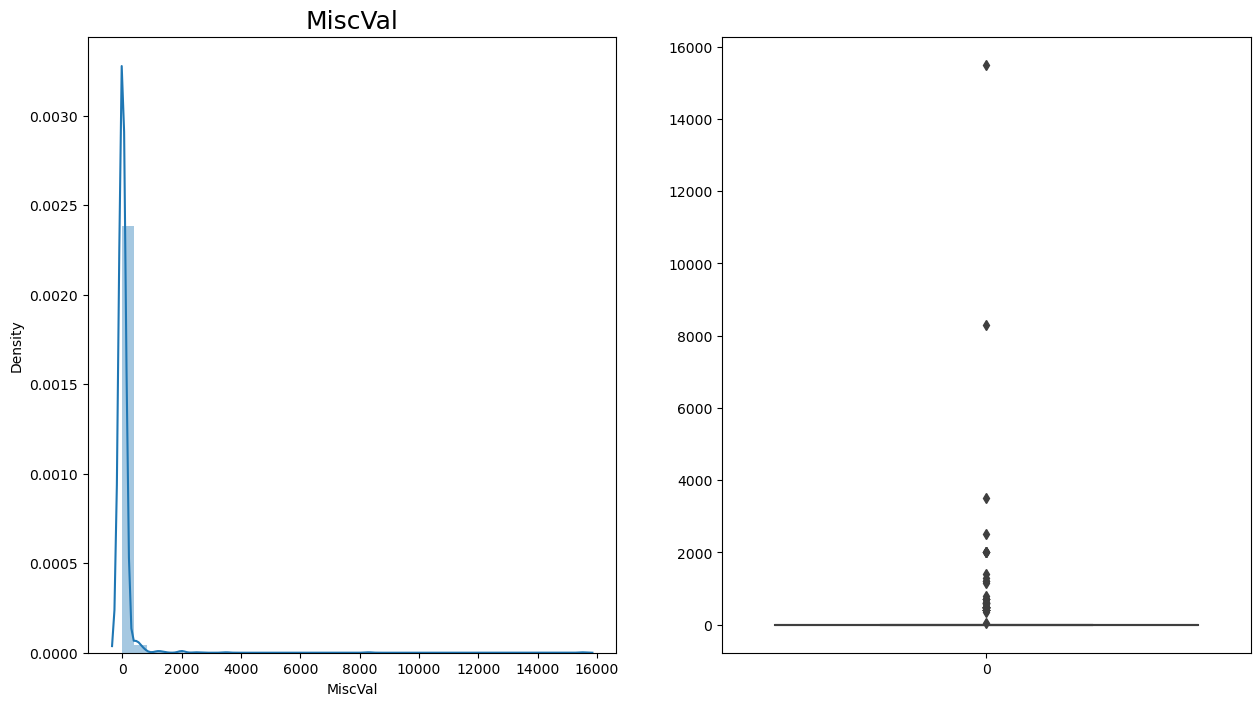

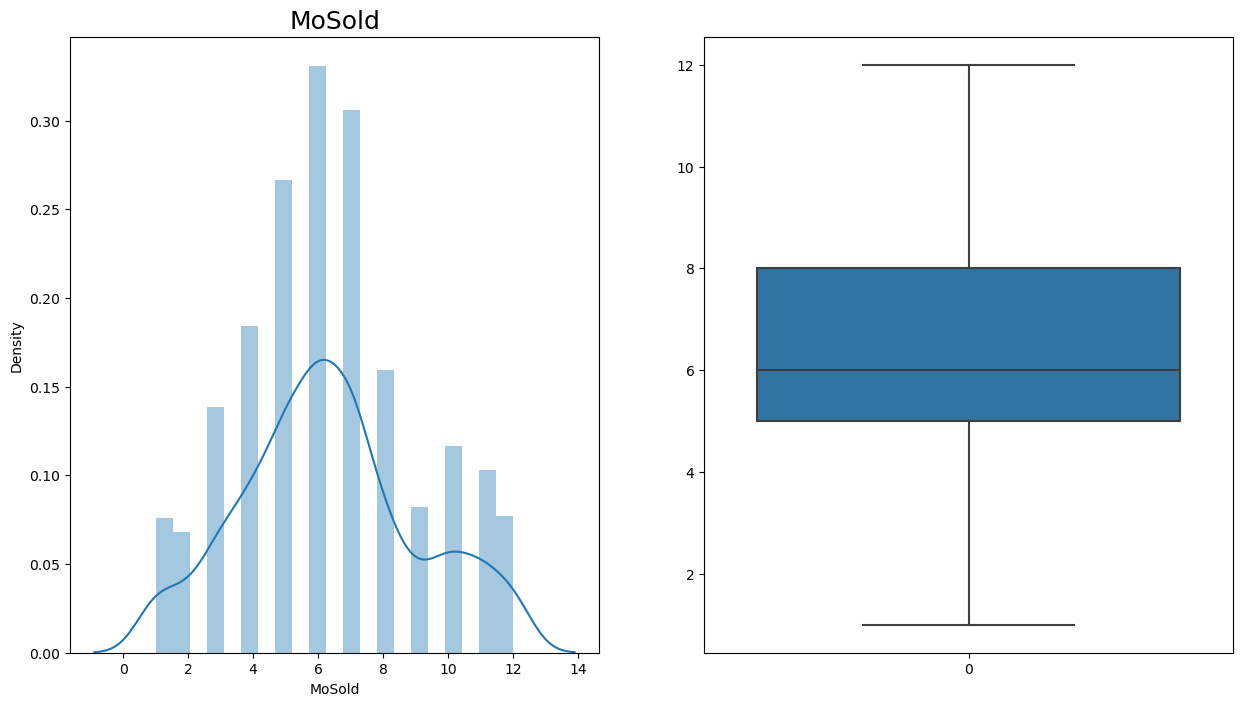

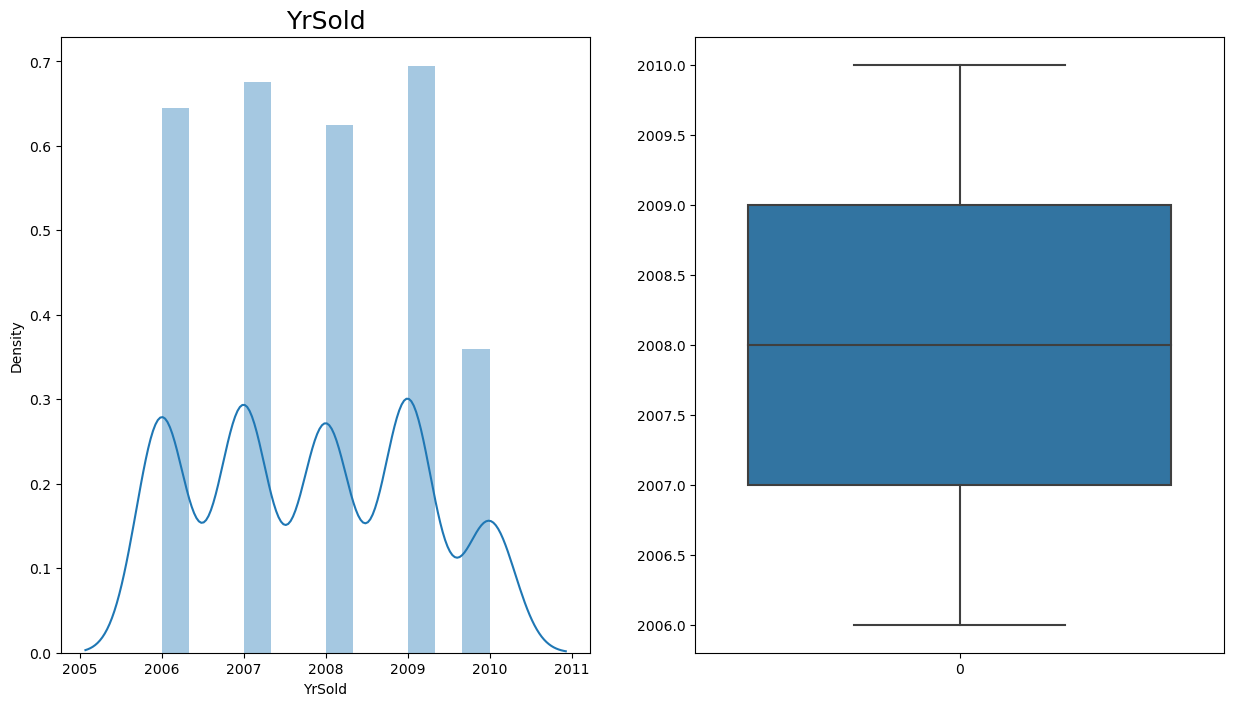

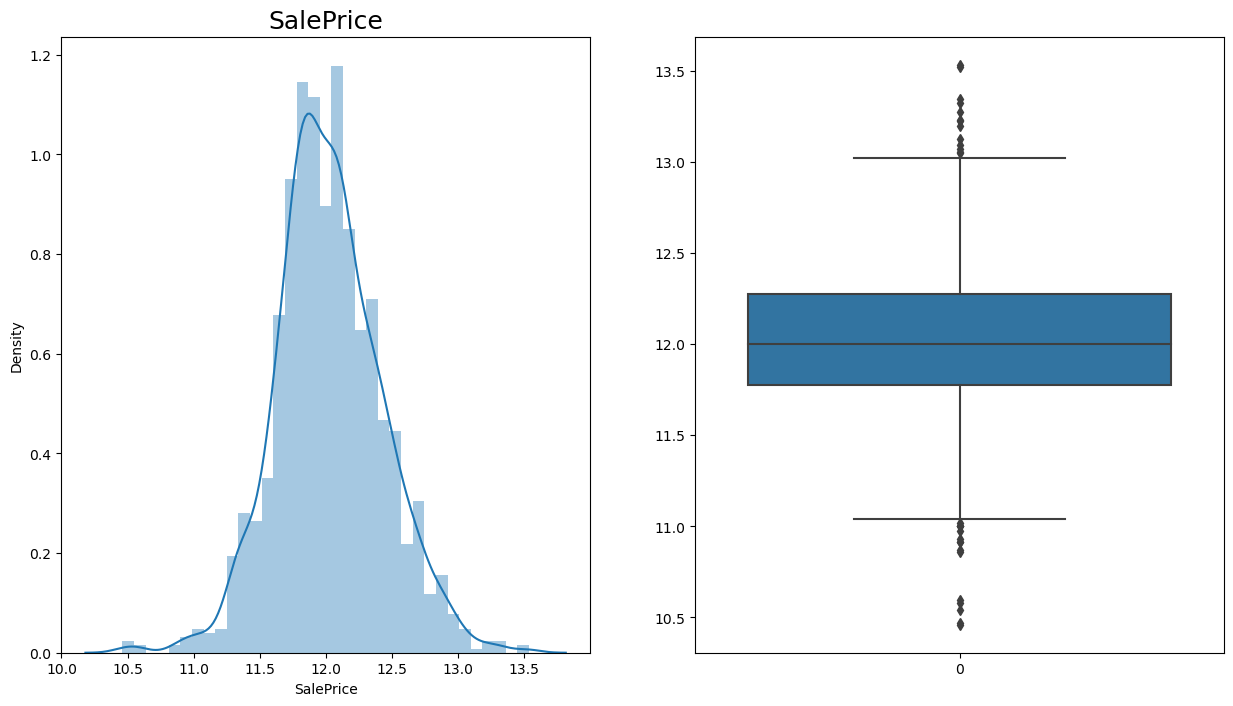

In [23]:
#View the distribution of numeric variables using histogram and boxplots

for col in house_df_num.columns:
    plt.figure(figsize = [15,8])
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict = {'fontsize':18})
    sns.distplot(house_df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(house_df_num[col])
    plt.show()

Many of the numerical columns have non-normal distribution. And most of the columns have outliers. Hence we would need to do outlier treatment

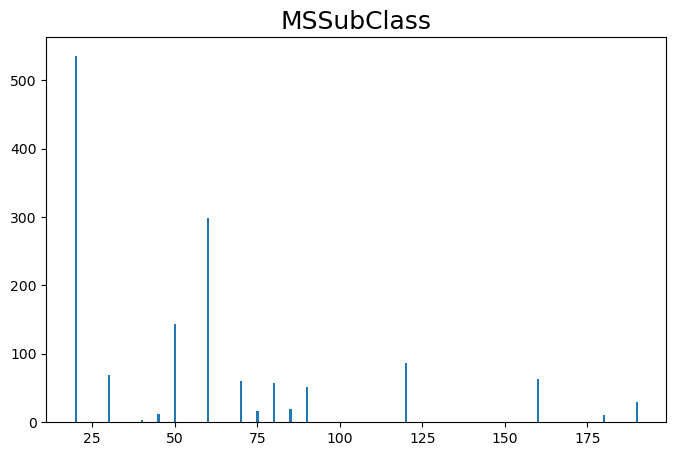

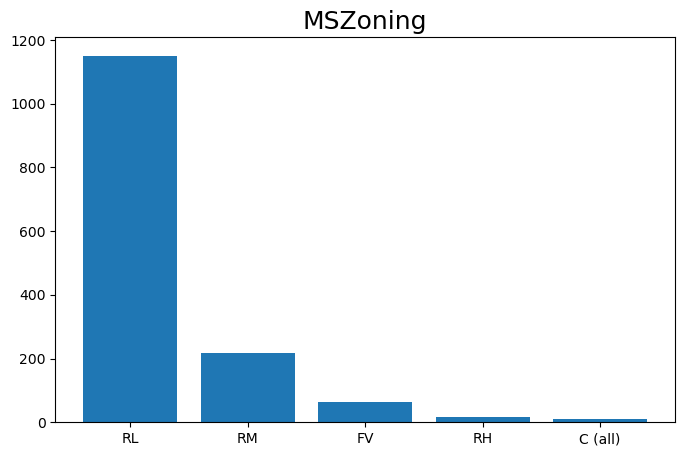

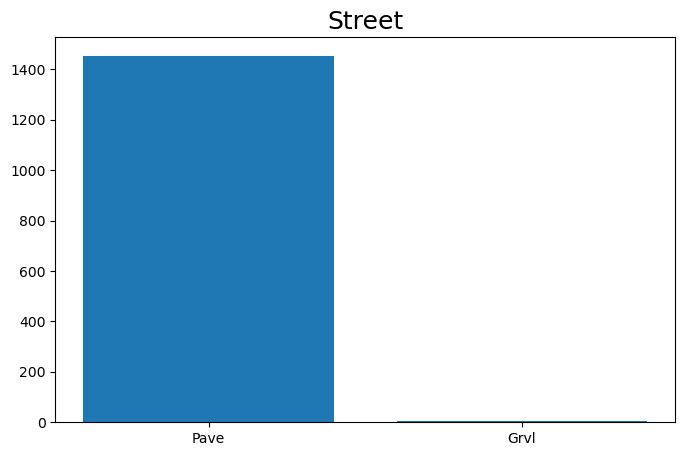

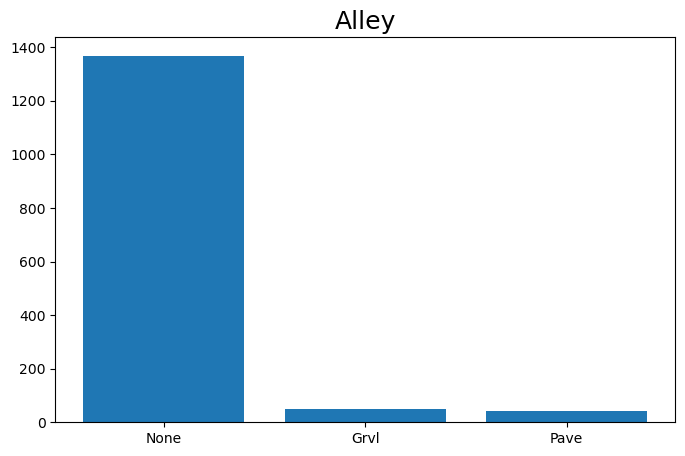

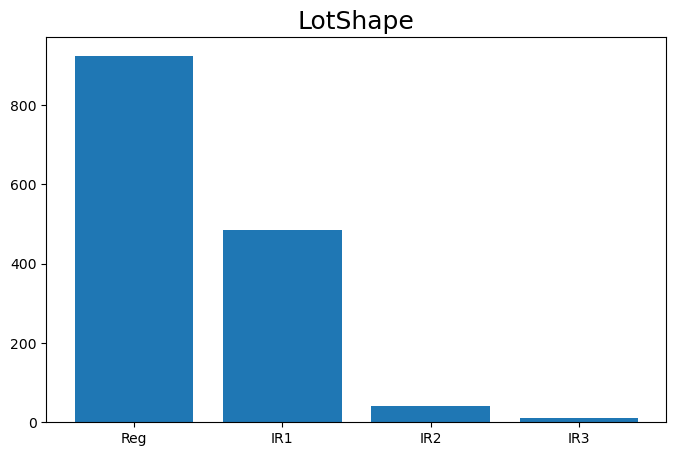

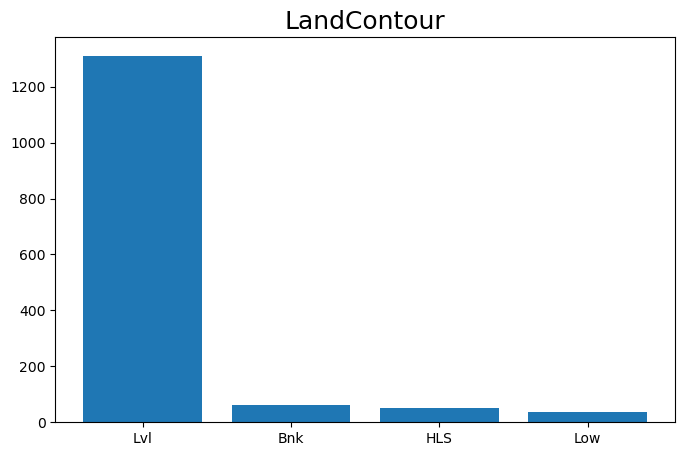

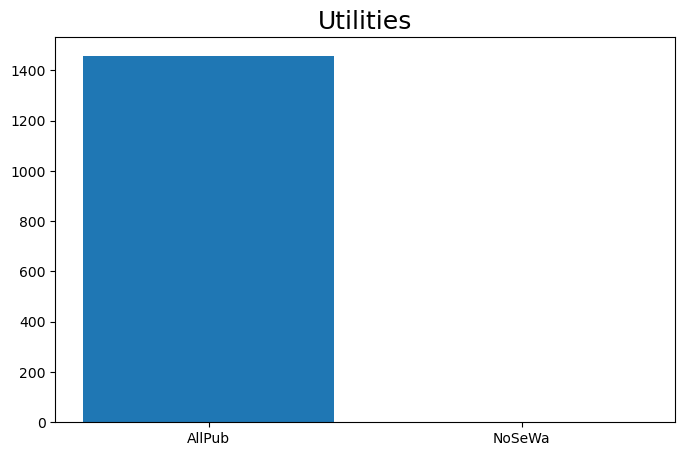

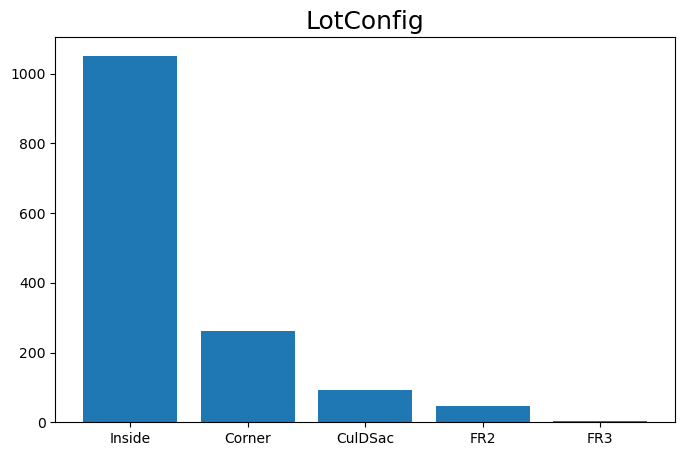

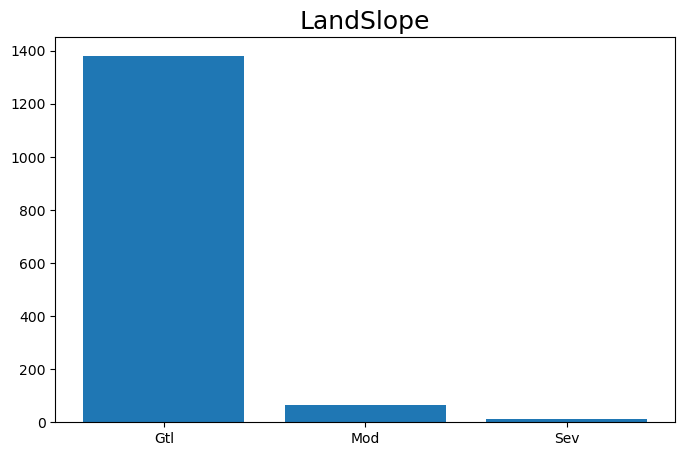

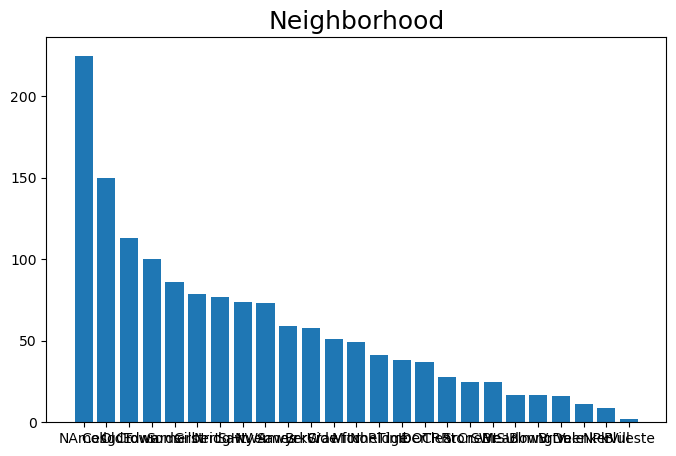

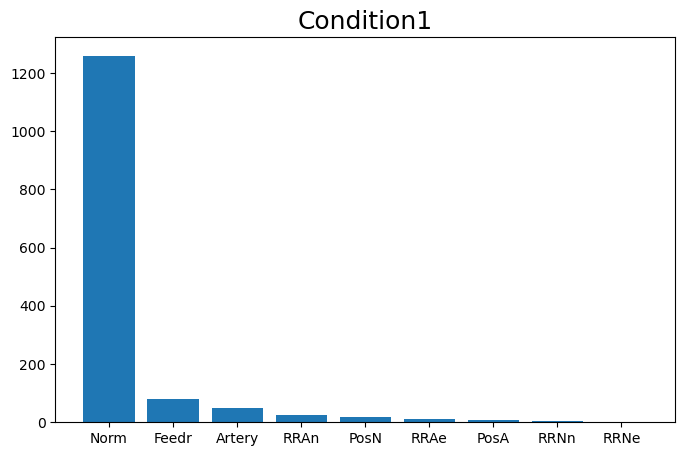

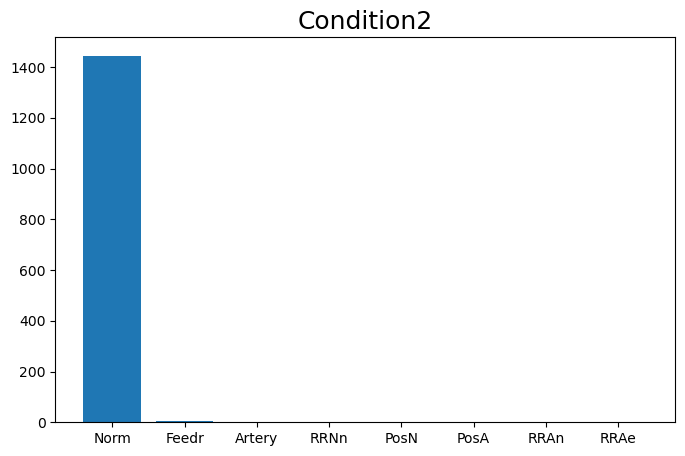

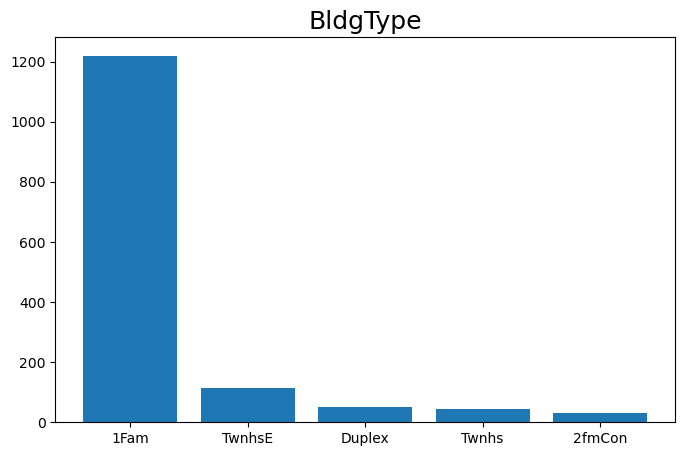

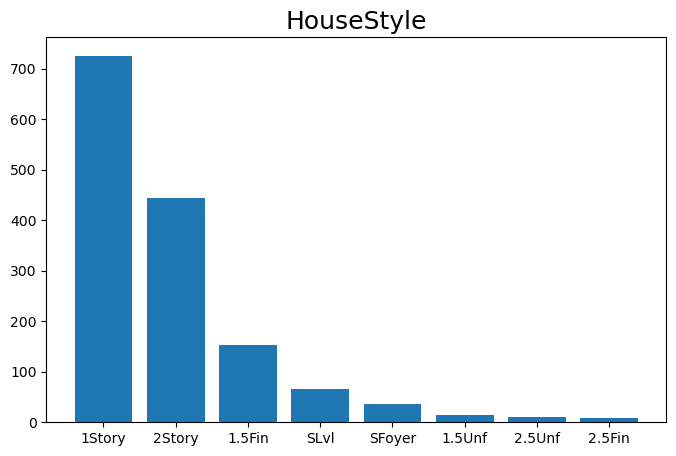

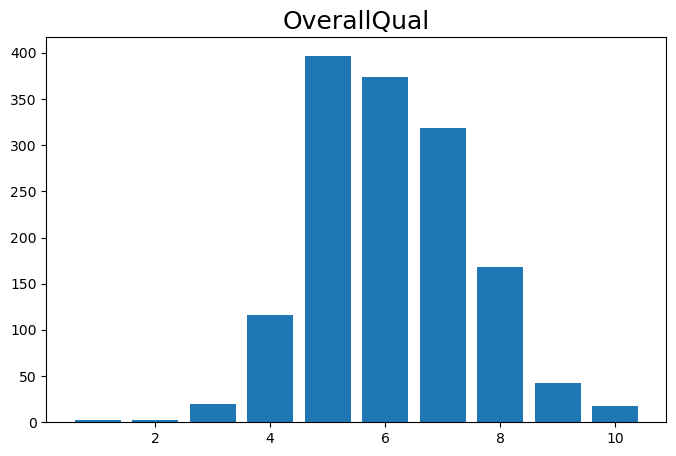

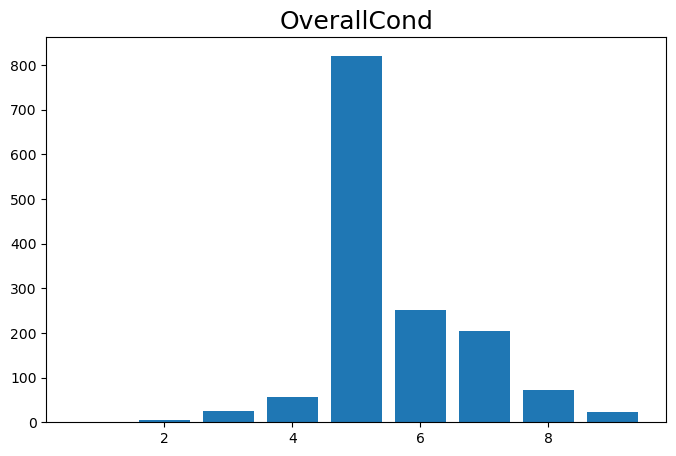

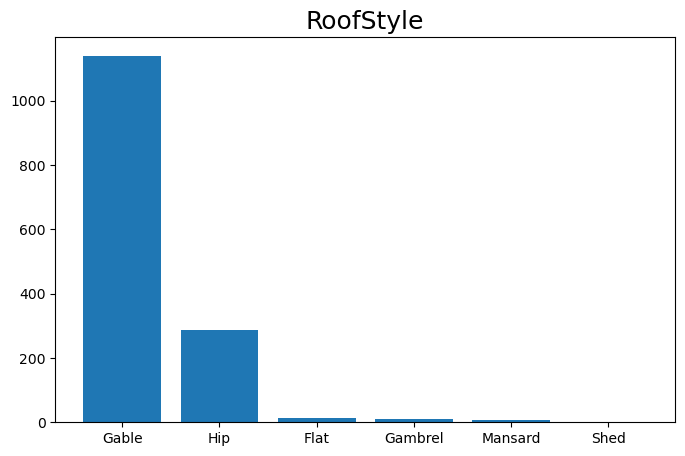

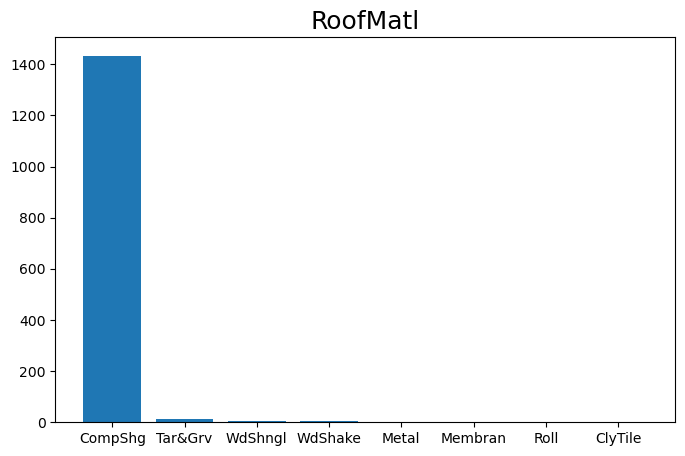

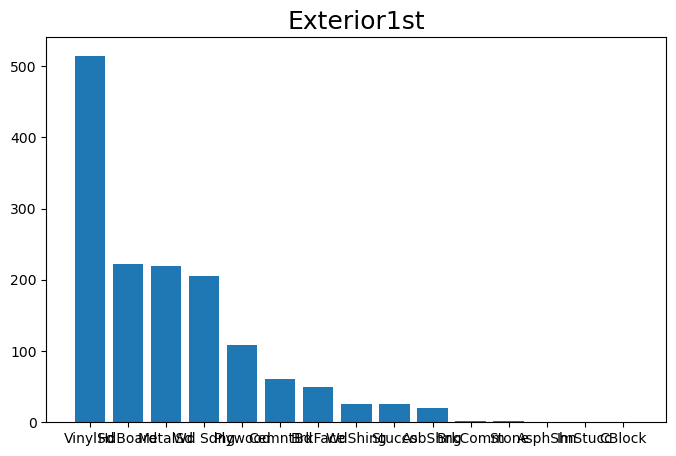

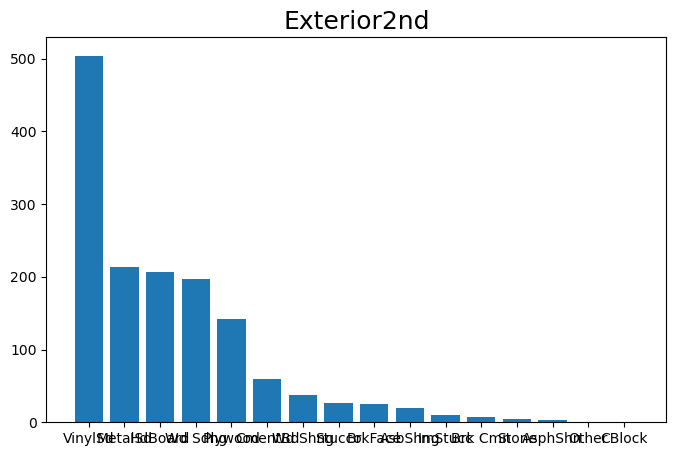

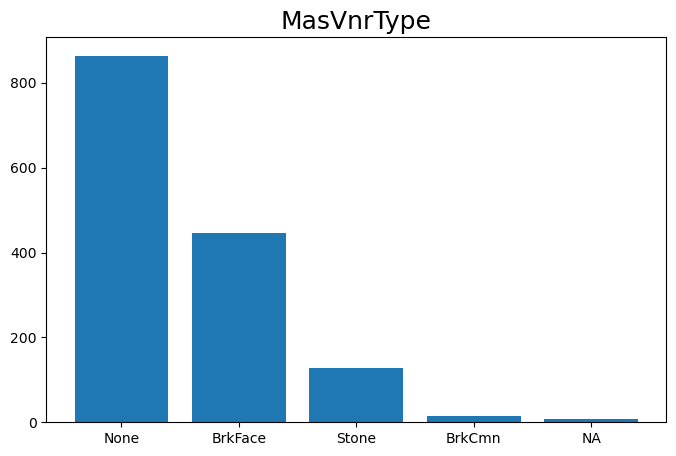

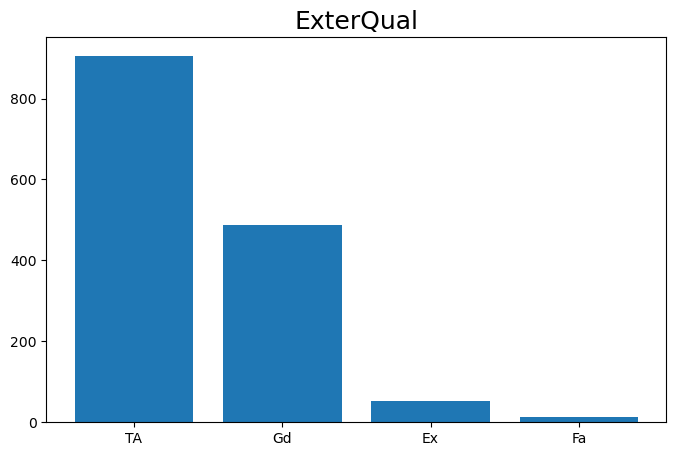

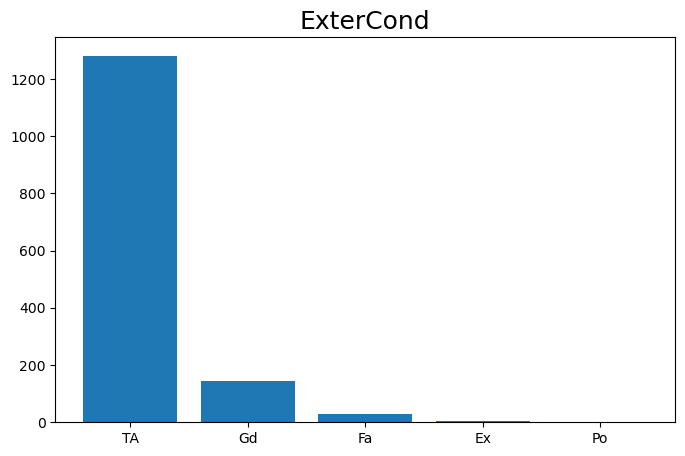

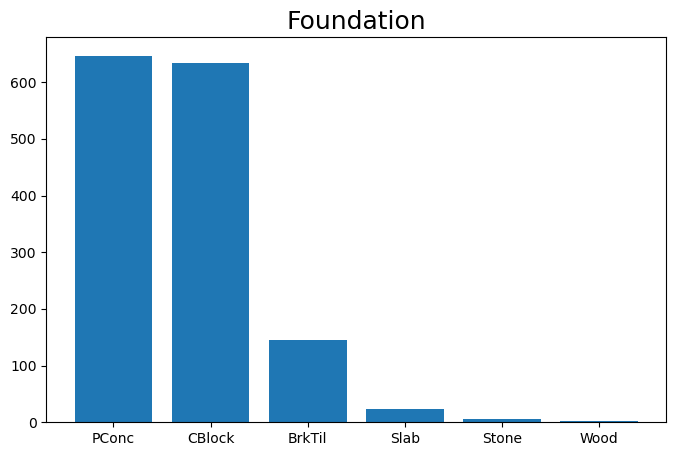

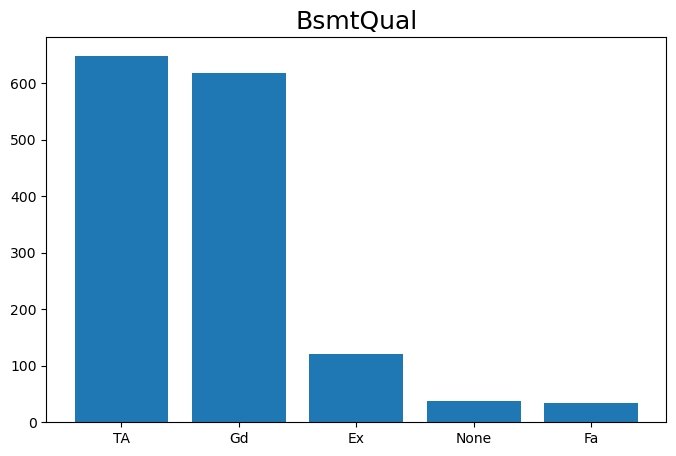

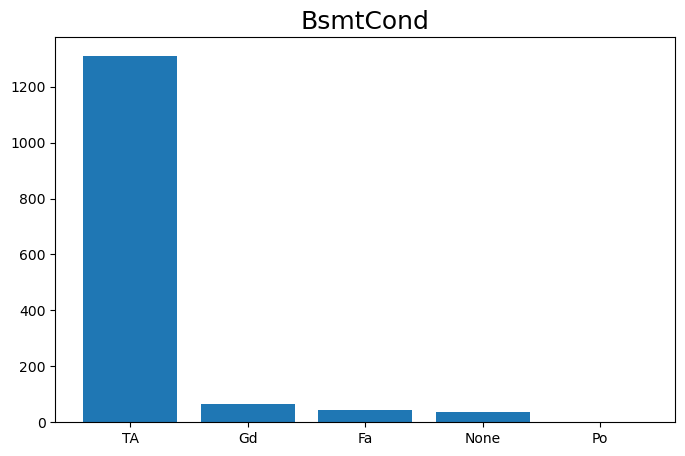

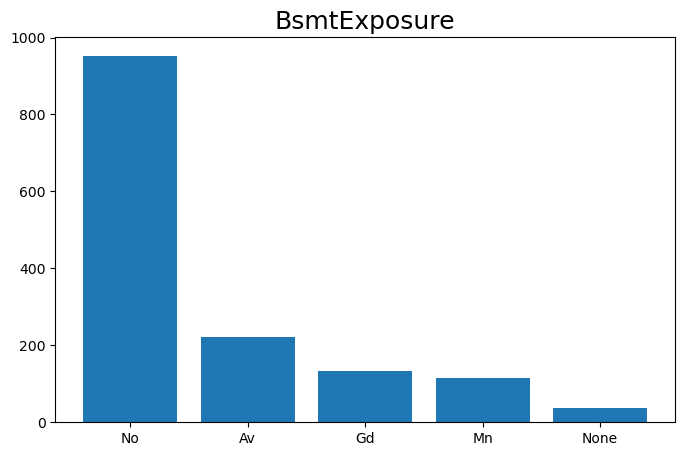

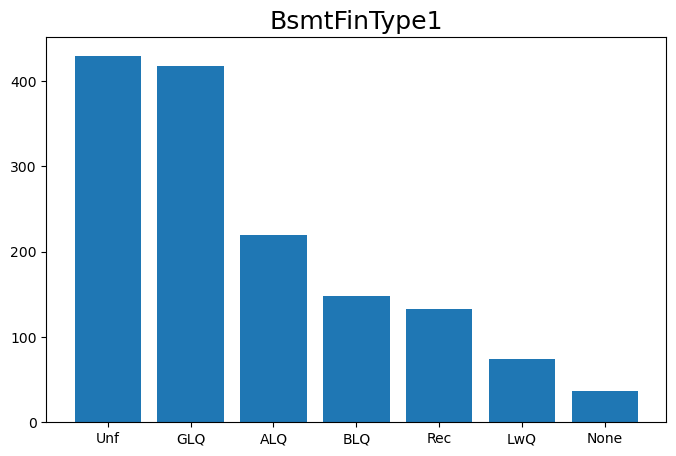

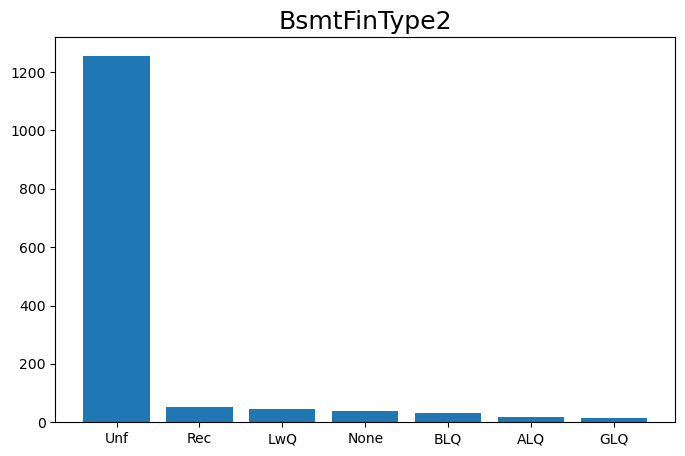

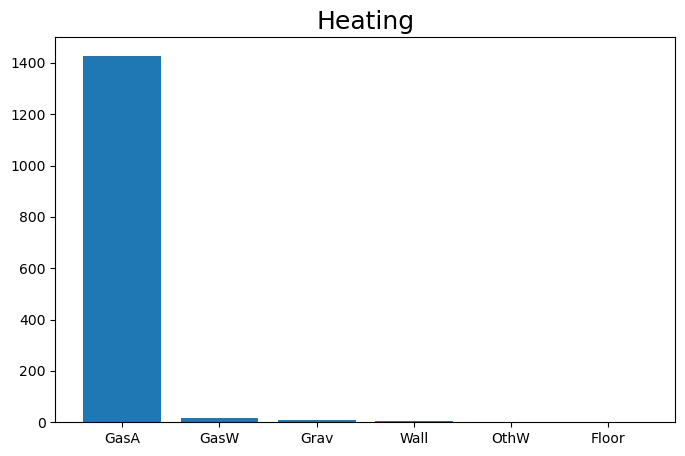

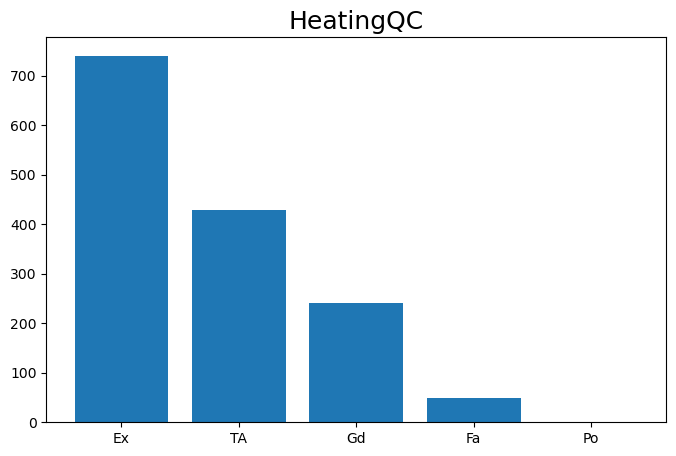

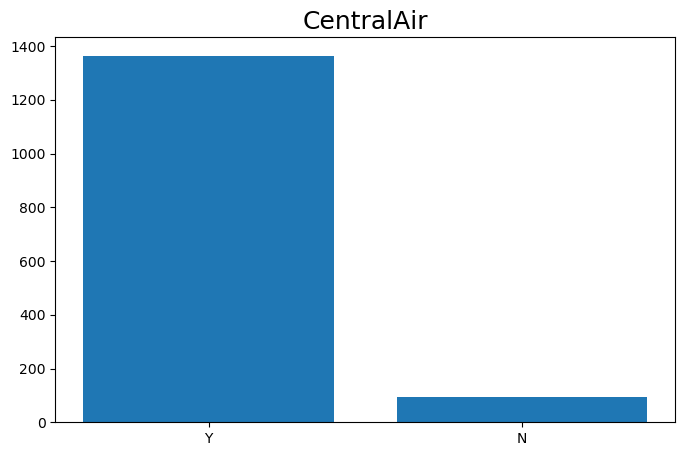

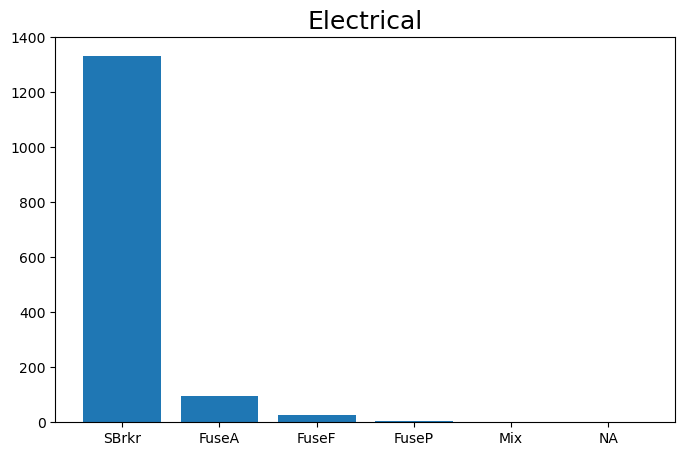

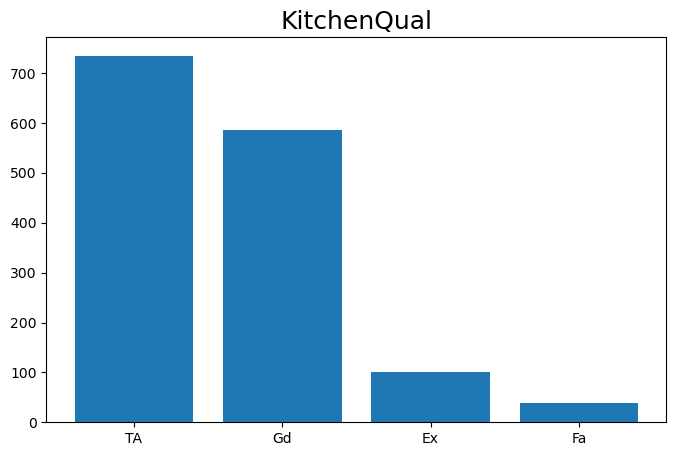

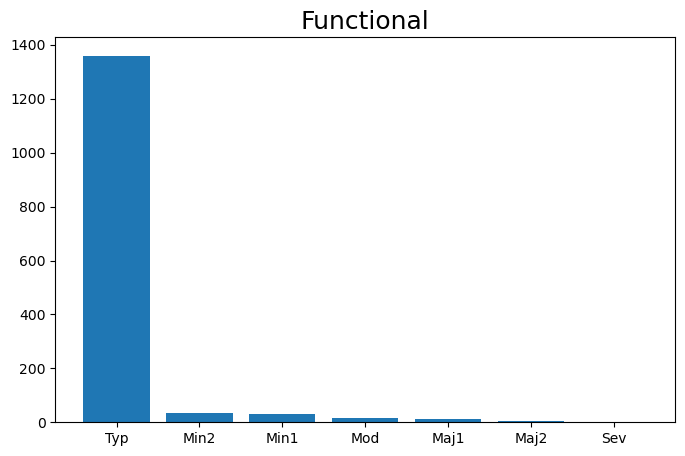

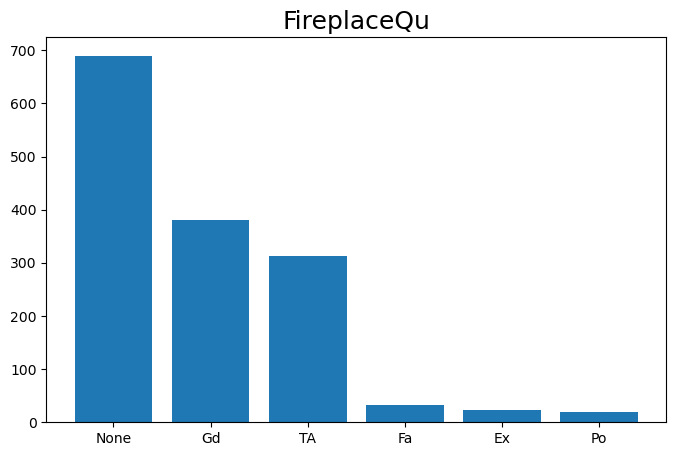

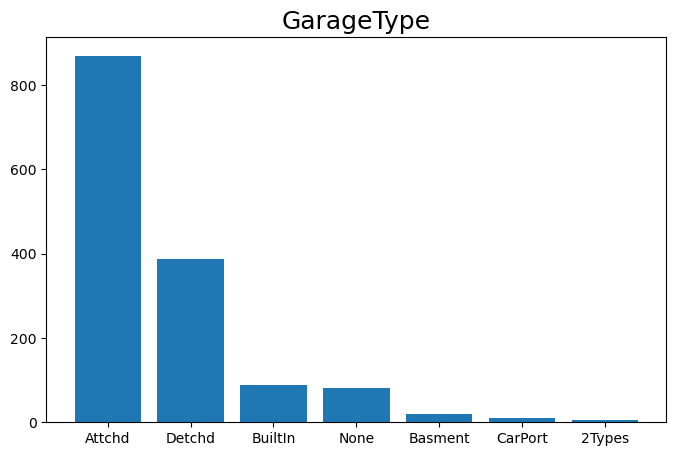

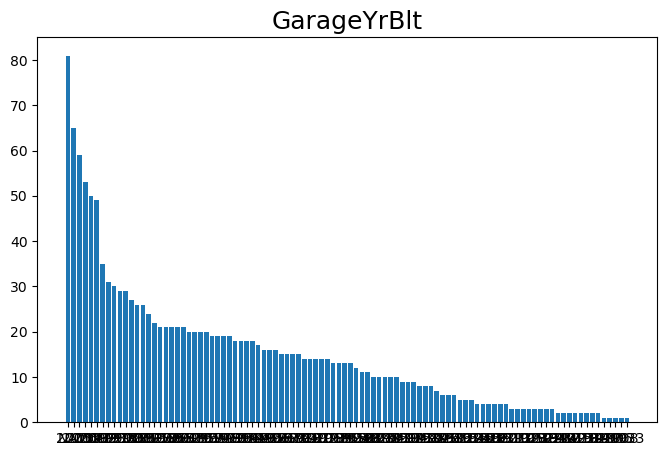

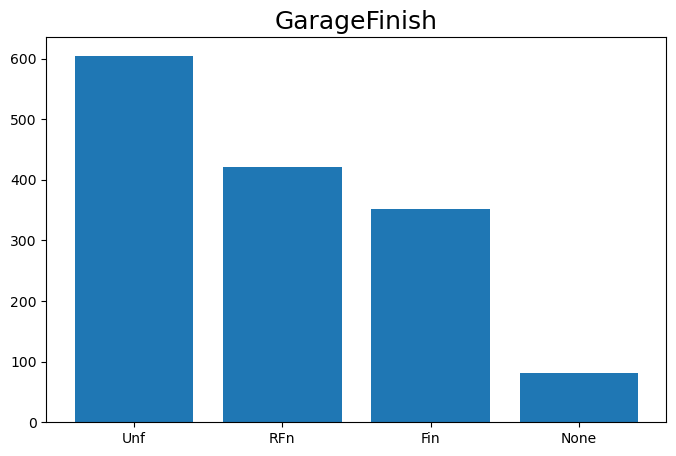

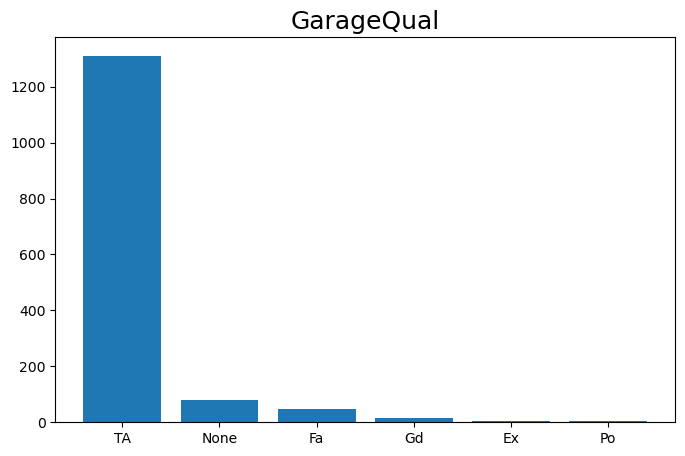

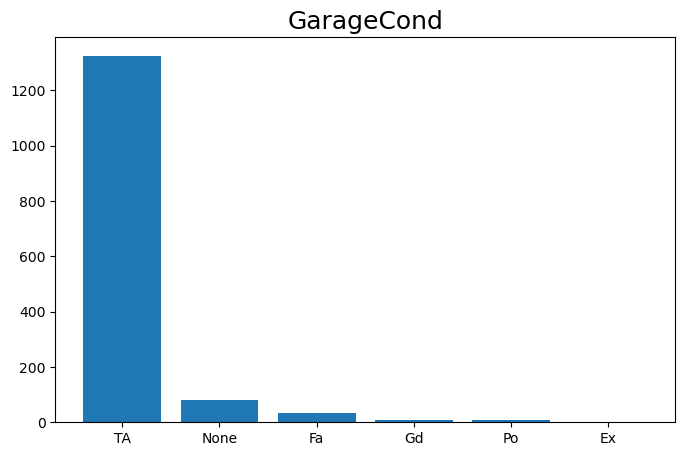

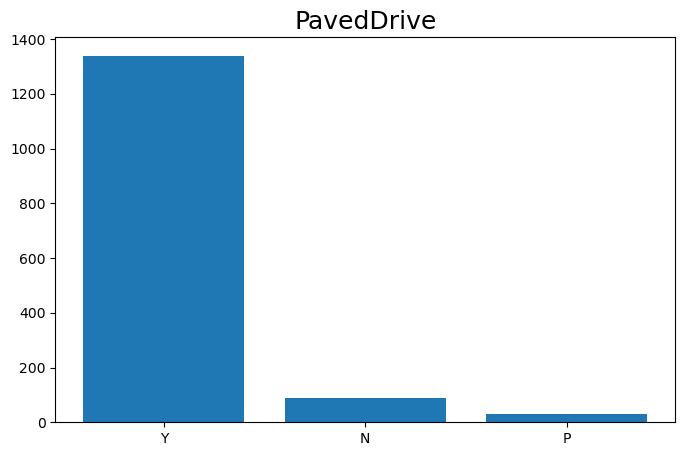

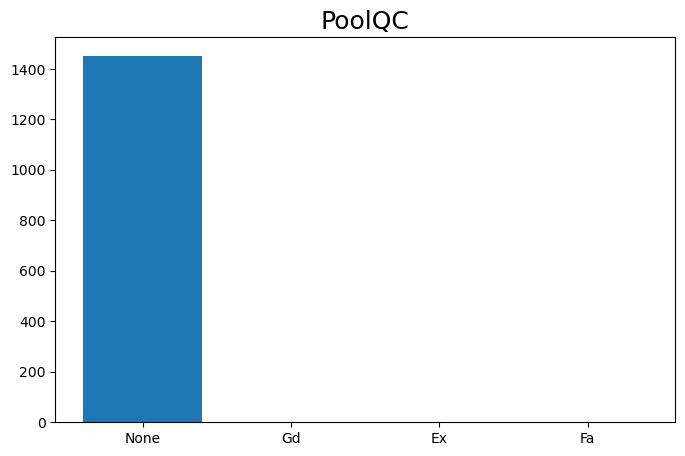

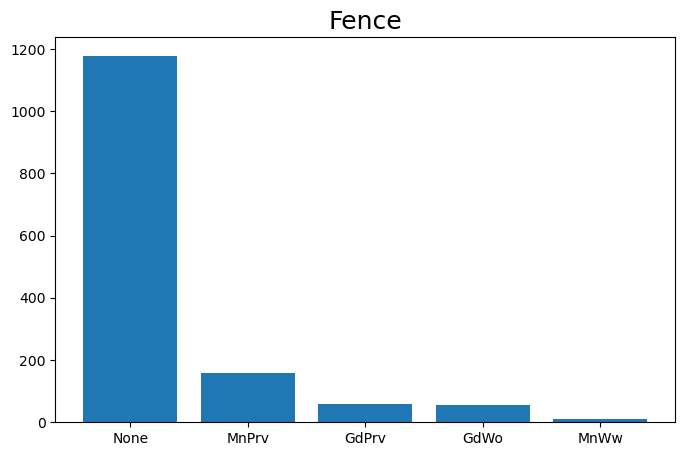

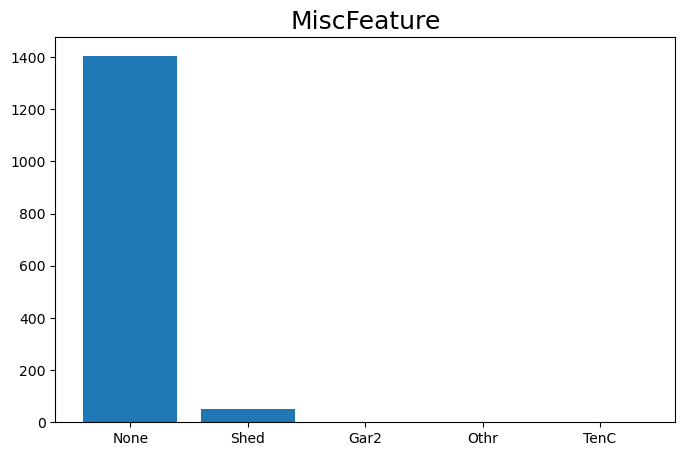

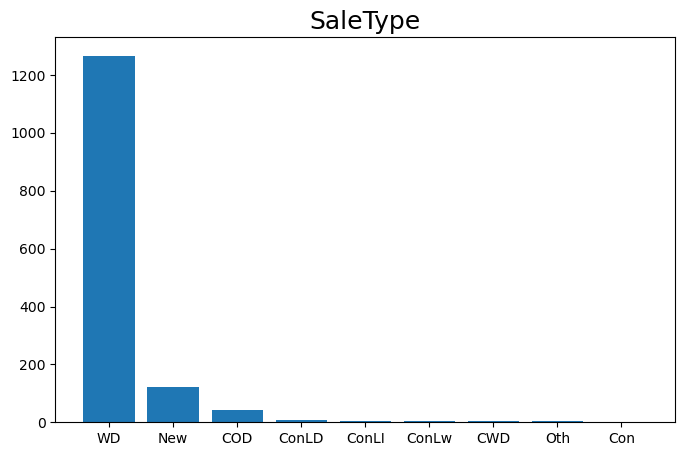

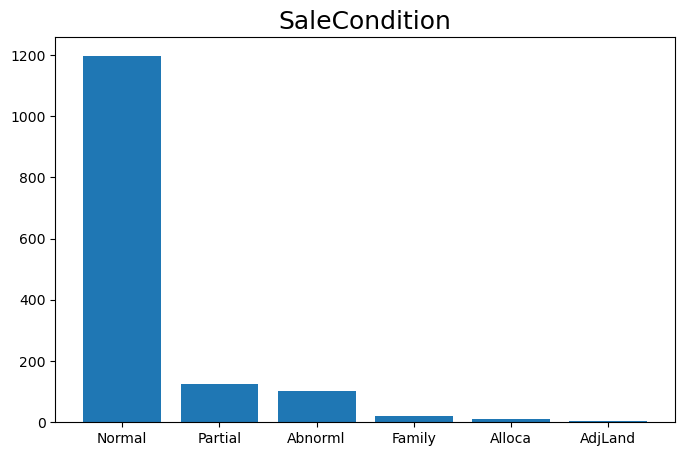

In [24]:
# Visualizing levels of categorical columns using bar plots
for col in house_df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    plt.bar(house_df_cat[col].value_counts().index, house_df_cat[col].value_counts())
    plt.show()

From above univariate analysis, it is observed that there is no column with single unique value that we could remove

<Axes: >

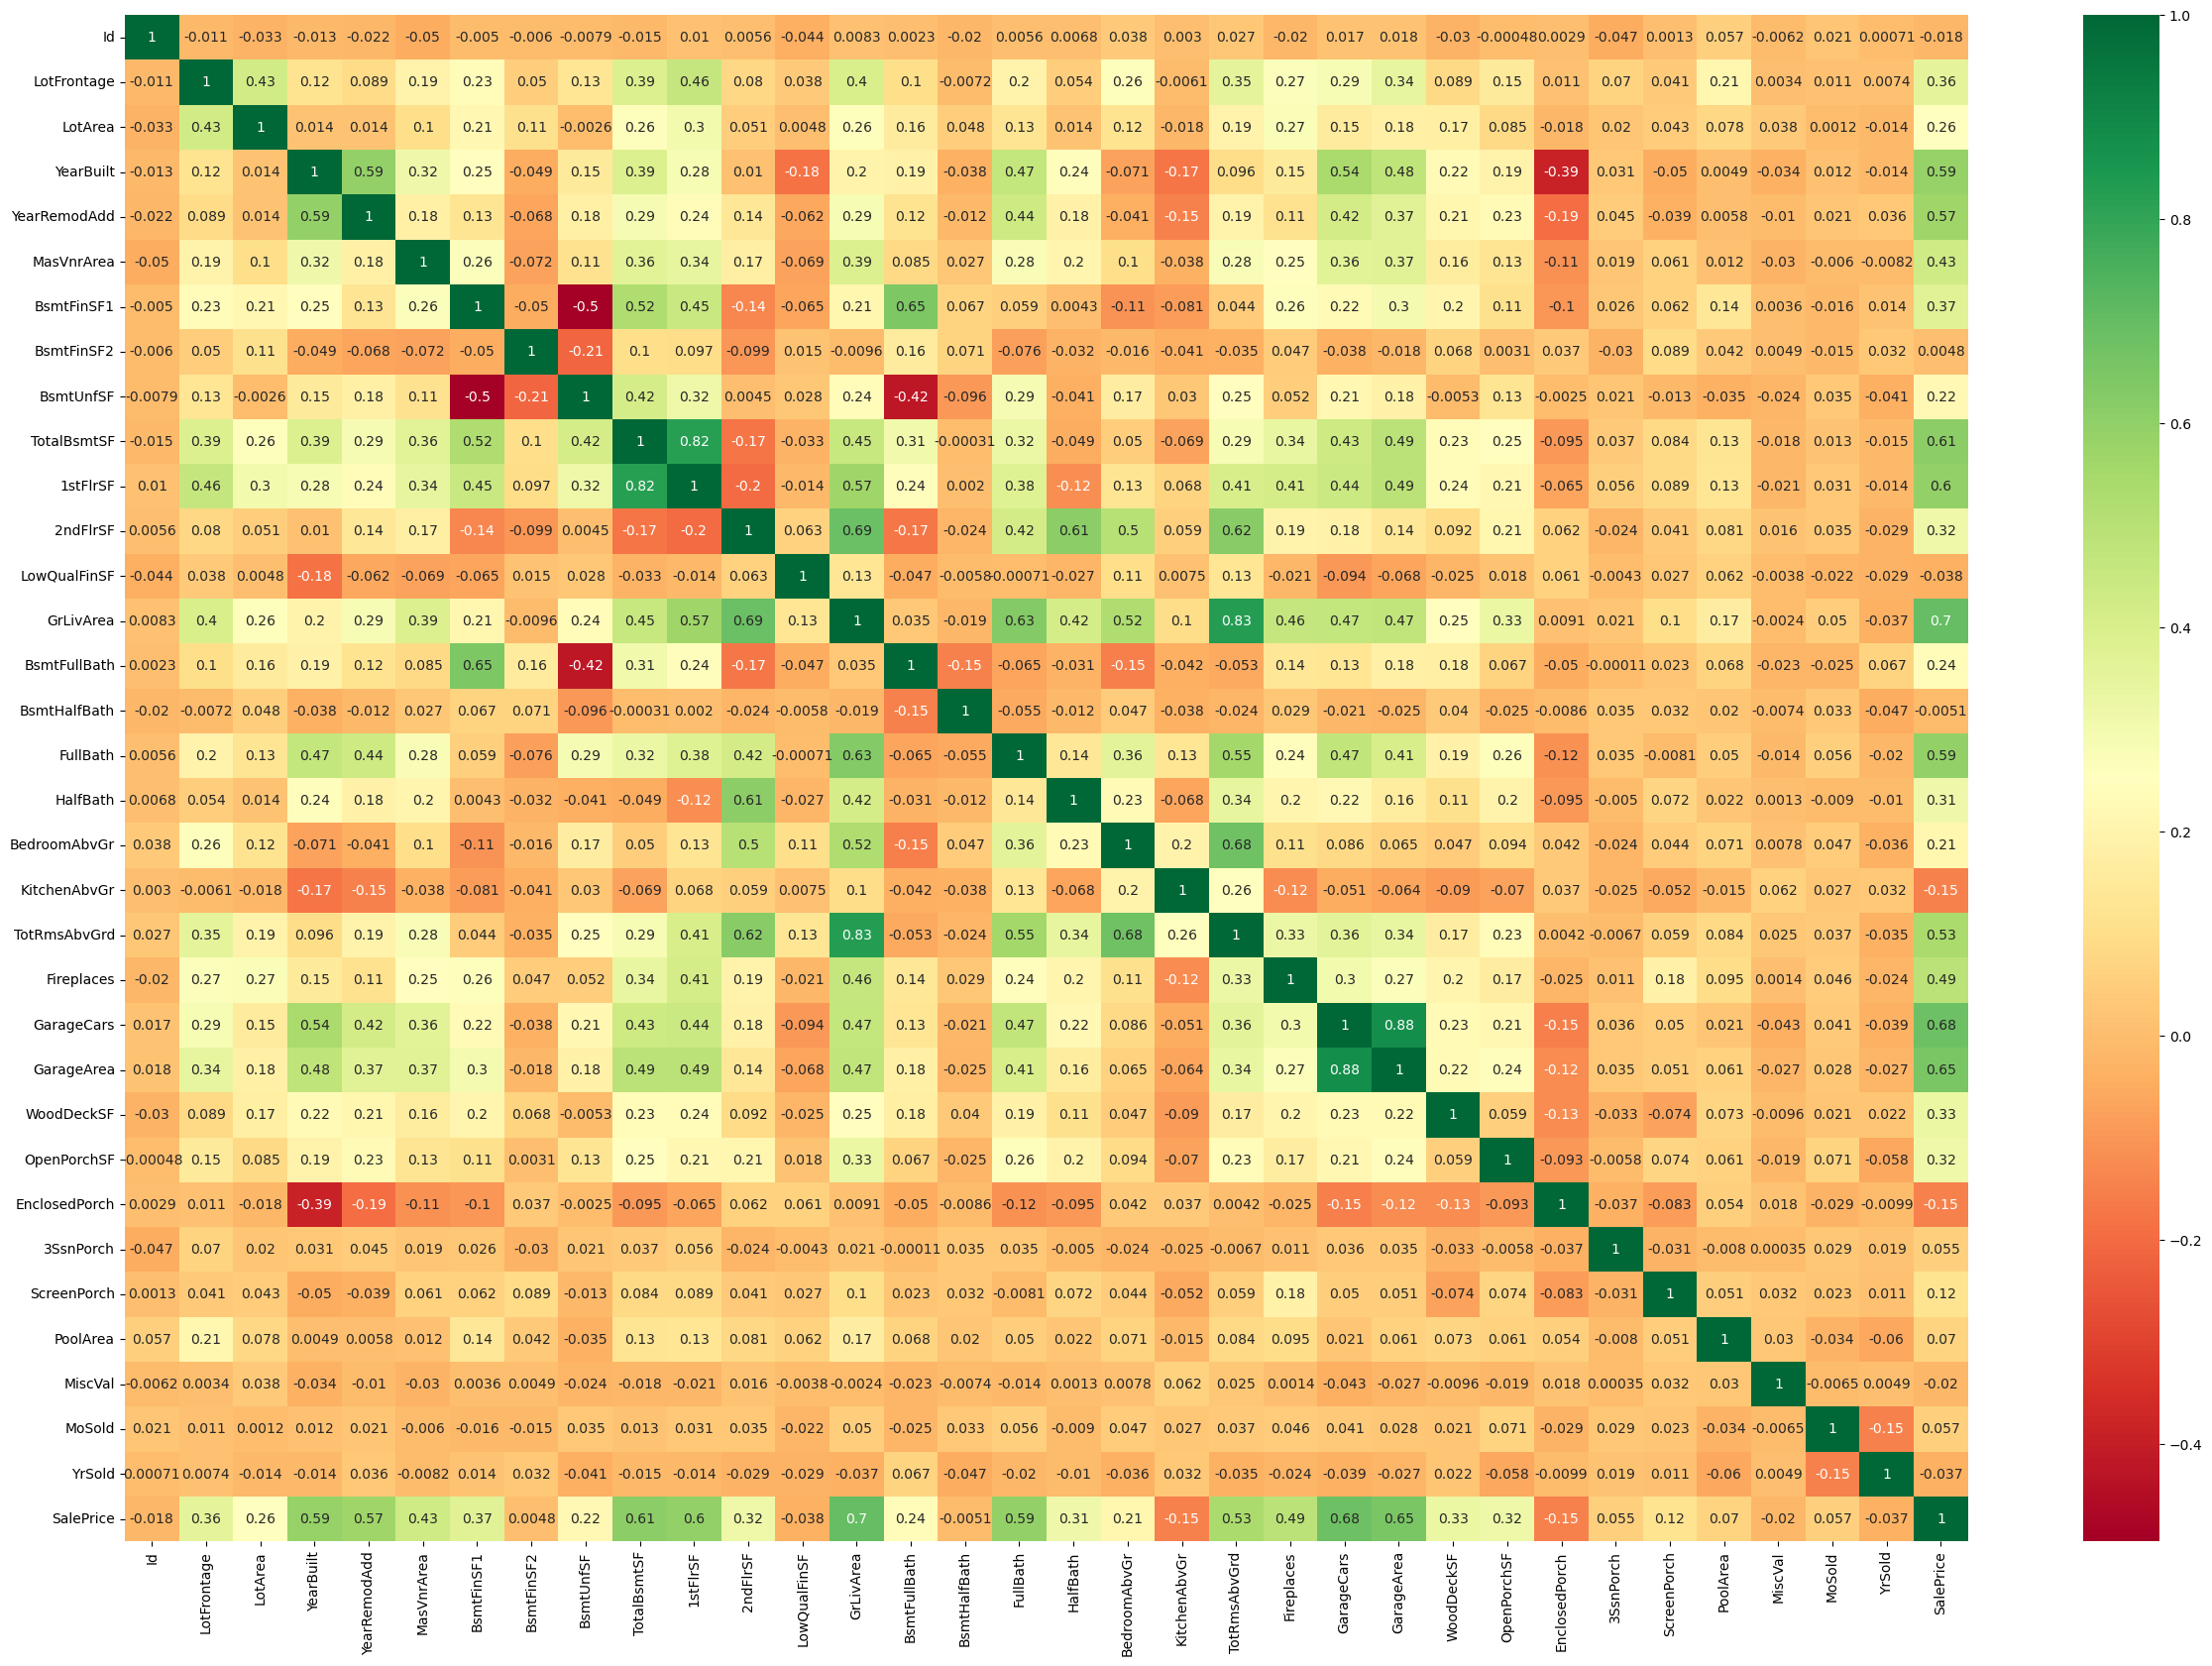

In [25]:
#Bivariate Analysis
#Plotting to obtain correlations among variables
plt.figure(figsize = [30,20])
sns.heatmap(house_df_num.corr(), annot = True, cmap='RdYlGn')

Target variable 'SalePrice' is highly correlated with 'GrLivArea', 'GarageCars' and 'GarageArea'. 

In [26]:
#Since we have data related to which year the house was built and year it was sold, we can get the age of the house. 
#Hence executing the same below.
house_df['Age'] = house_df['YrSold'] - house_df['YearBuilt']

In [27]:
#Dropping these columns as we have the created 'Age' column
house_df.drop(['YrSold','YearBuilt'], axis = 1, inplace = True)

In [28]:
#Viewing dataframe
house_df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

In [29]:
#Data Preprocessing
house_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

There are only two columns with missing values, 'LotFrontAge' and 'MasVnrArea'. We will be replacing missing values by mean value

In [30]:
#Treating missing values
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(), inplace=True)
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(), inplace=True)

In [31]:
#QC step to recheck
house_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

The missing value treatment is done

In [32]:
#Dummy Variable Creation
#Separating categorical and numerical features again as two columns were dropped and one new column was added
house_df_num = house_df.select_dtypes(include = ['int64', 'float64'])
house_df_cat = house_df.select_dtypes(include = 'object')

house_df_cat_encoded = pd.get_dummies(house_df_cat, drop_first = True)
house_df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [33]:
#Checking dimensions
house_df_cat_encoded.shape

(1460, 353)

<Axes: >

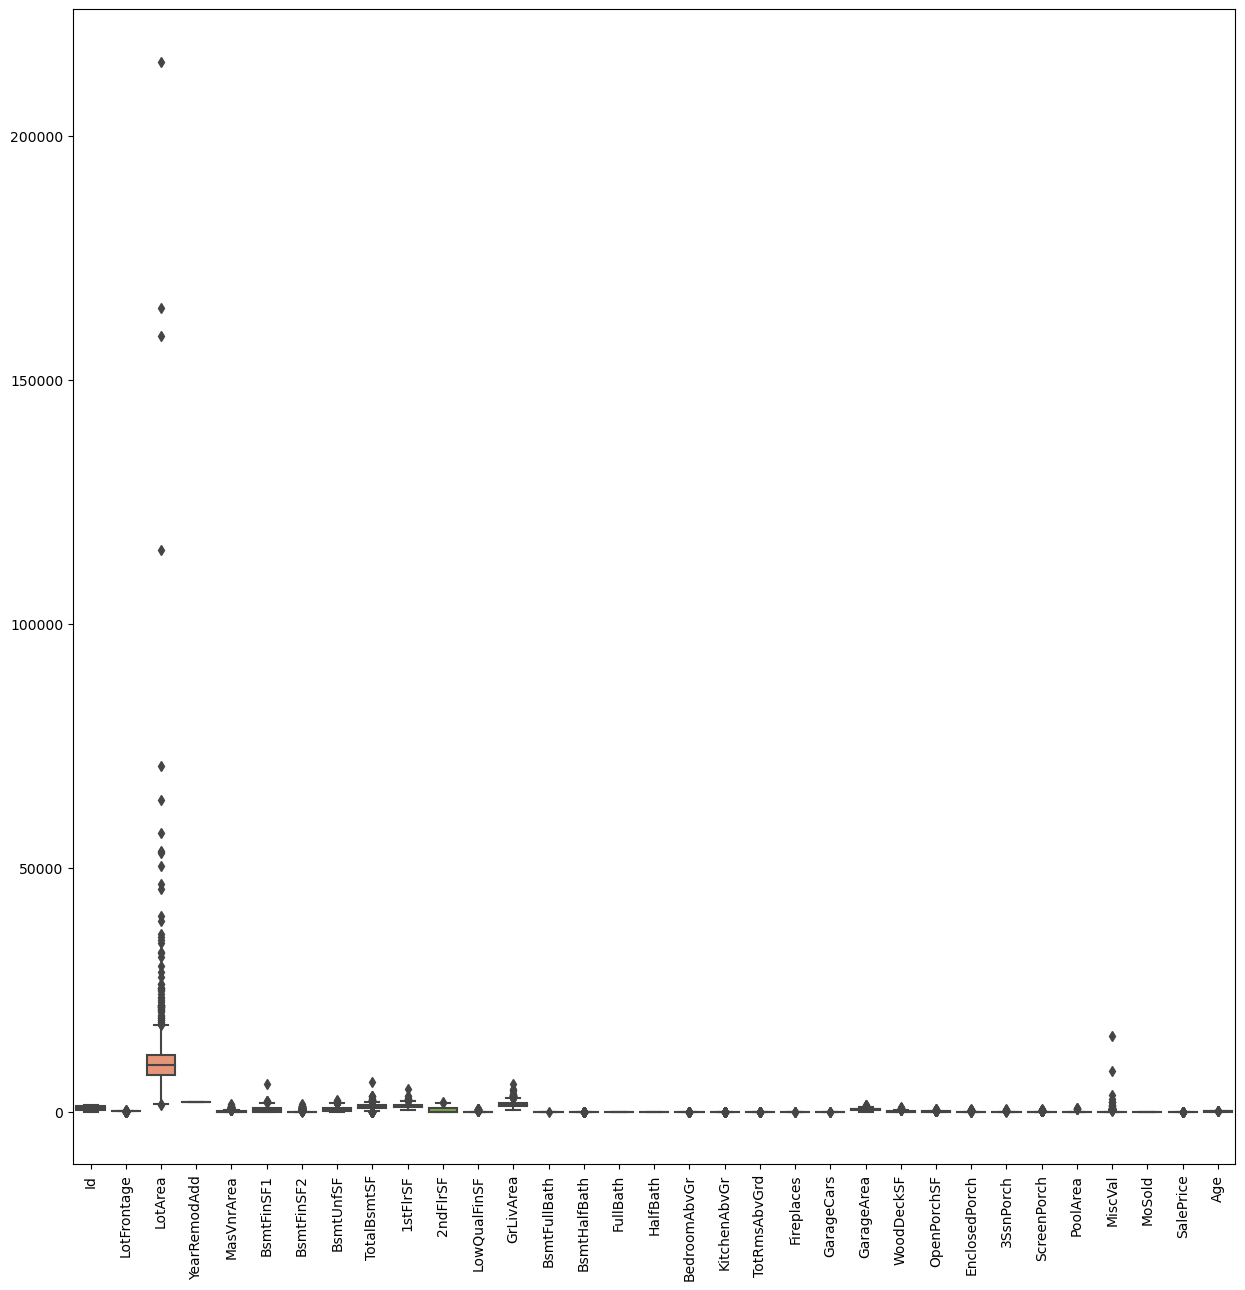

In [34]:
#Outlier Treatment
plt.figure(figsize = [15,15])
plt.xticks(rotation = 90)
sns.boxplot(data = house_df_num)

In [35]:
# Capping outliers to 5% at lower bound and 95% at upper bound
for col in house_df_num.columns:
    house_df_num[col][house_df_num[col] <= house_df_num[col].quantile(0.05)] = house_df_num[col].quantile(0.05)
    house_df_num[col][house_df_num[col] >= house_df_num[col].quantile(0.95)] = house_df_num[col].quantile(0.95)

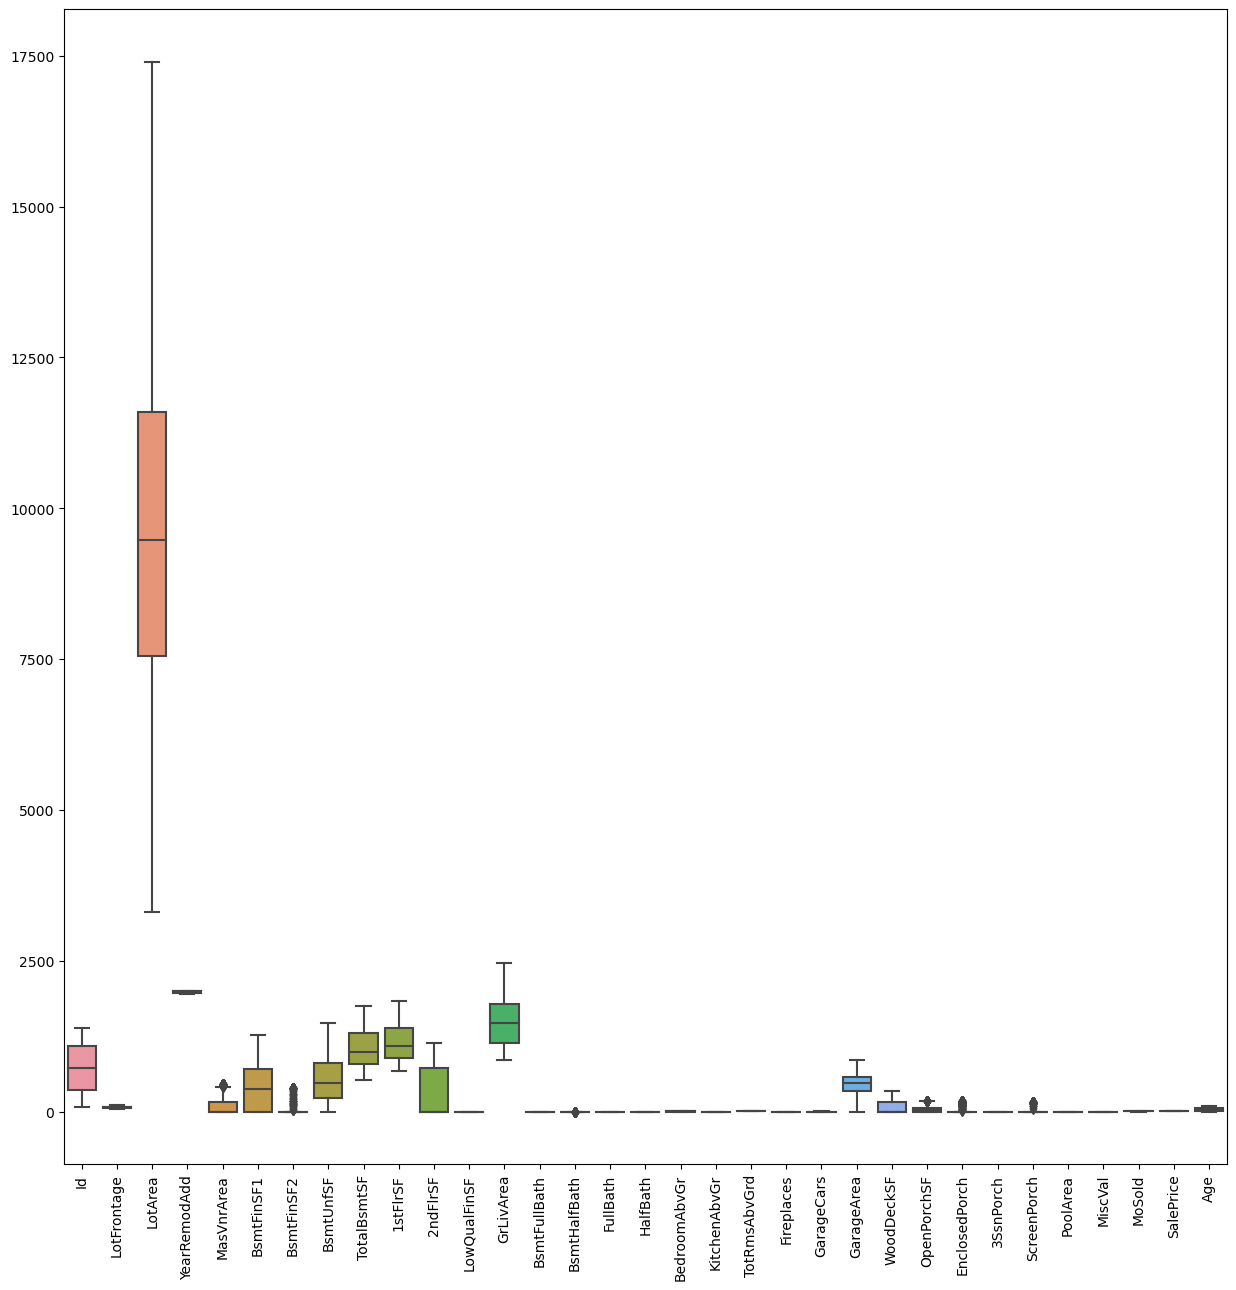

In [36]:
# Checking boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=house_df_num);

The above graph shows that outliers have been treated

In [37]:
#Concating the outlier treated numerical columns with one hot encoded categorical column
house_df = pd.concat([house_df_num, house_df_cat_encoded], axis = 1)

In [38]:
#Viewing the entire dataframe
house_df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      11  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   


In [39]:
#Checking the dimensions
house_df.shape

(1460, 386)

In [40]:
#Model Building, tuning and evaluation
#Splitting independent variables
X = house_df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

In [41]:
#Taking target variable
y = house_df['SalePrice'].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [42]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [43]:
#Checking dimensions 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 384)
(438, 384)
(1022,)
(438,)


In [44]:
#Scaling
#Creating a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [45]:
#Creating a scaling instance
scaler = StandardScaler()

#Scaling the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [46]:
#Model 1 -  Lasso Regression
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9210986203817577
0.9255893479304527


In [47]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = X_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('LotFrontage', 11.844),
 ('LotArea', 0.004),
 ('YearRemodAdd', 0.022),
 ('MasVnrArea', 0.028),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.026),
 ('BsmtUnfSF', 0.002),
 ('TotalBsmtSF', -0.002),
 ('1stFlrSF', 0.041),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.009),
 ('GrLivArea', 0.0),
 ('BsmtFullBath', 0.107),
 ('BsmtHalfBath', 0.007),
 ('FullBath', -0.0),
 ('HalfBath', 0.006),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', -0.0),
 ('GarageCars', 0.024),
 ('GarageArea', 0.027),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.012),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.011),
 ('MiscVal', 0.0),
 ('MoSold', 0.0),
 ('Age', 0.0),
 ('MSSubClass_30', -0.053),
 ('MSSubClass_40', -0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', 0.0),
 ('MSSubClass_70', -0.0),
 ('MSSubClass_75', 0.031),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', 0.0),
 ('MSSubClass_120', -0.0

We can see the above alpha value is near to optimal for lasso as we can see in the train and test score is quite similar. Now let check whether we can improve our model by using GridSearchCV for optimal value of alpha

In [48]:
#Using KFold for model validation
folds = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True,
                        n_jobs = -1
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
#Checking on the summary of test and train score based on alpha
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.147280      0.045041         0.020258        0.007309        0.001   
1       0.065626      0.018222         0.017184        0.010937        0.010   
2       0.048438      0.004686         0.014058        0.004686        0.100   
3       0.039063      0.007811         0.012496        0.006248        1.000   
4       0.040627      0.007652         0.014054        0.004685        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.911992           0.907867           0.894896   
1   {'alpha': 0.01}           0.856166           0.859553           0.858617   
2    {'alpha': 0.1}           0.657946           0.670868           0.643136   
3    {'alpha': 1.0}          -0.011518          -0.021320          -0.014341   
4    {'alpha': 5.0}          -0.011518          -0.021320          -0.014341   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.930473           0.924634           0.898795           0.849140   
1           0.888327           0.865879           0.838556           0.778913   
2           0.664662           0.658735           0.650004           0.628377   
3          -0.001008          -0.000968          -0.056031          -0.003969   
4          -0.001008          -0.000968          -0.056031          -0.003969   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.904076           0.894124           0.888488         0.900448   
1           0.844290           0.766132           0.851142         0.840757   
2           0.626443           0.583199           0.636011         0.641938   
3          -0.016041          -0.000149          -0.006196        -0.013154   
4          -0.016041          -0.000149          -0.006196        -0.013154   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.021300                1            0.921295            0.920573   
1        0.036500                2            0.849308            0.847323   
2        0.024223                3            0.650010            0.645968   
3        0.015860                4            0.000000            0.000000   
4        0.015860                4            0.000000            0.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.924306            0.920474            0.920862   
1            0.847273            0.844450            0.846854   
2            0.642992            0.649189            0.646093   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.921831            0.926867            0.921482   
1            0.850547            0.857059            0.849696   
2            0.654704            0.654839            0.644369   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.921205            0.924639          0.922353         0.002045  
1            0.856020            0.848283          0.849681         0.003797  
2            0.662662            0.651960          0.650279         0.005674  
3            0.000000            0.000000          0.000000         0.000000  
4            0.000000            0.000000          0.000000         0.000000

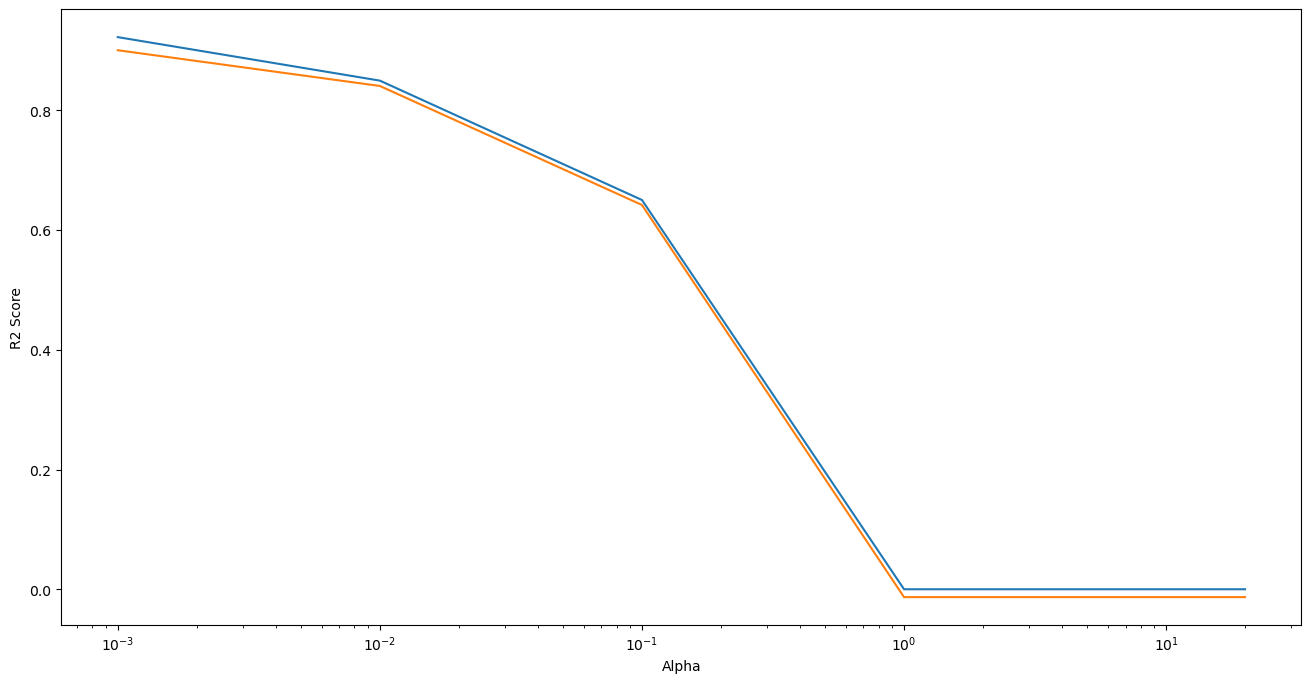

In [50]:
#Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [51]:
#Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [52]:
#After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9210986203817577
0.9255893479304527


In [53]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [54]:
#Significant variables which predict price of house when used lasso
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Featuere       Coef
0             LotFrontage  11.843954
123        OverallQual_10   0.132911
122         OverallQual_9   0.111288
12           BsmtFullBath   0.106513
71   Neighborhood_Edwards   0.088331
237        FireplaceQu_Fa   0.077484
147    Exterior1st_CBlock   0.075473
223      Electrical_FuseF   0.042899
86   Neighborhood_StoneBr   0.042080
8                1stFlrSF   0.041423

In [55]:
#Model 2 - Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9579730590919646
0.8486016155222933


We can see the above alpha value is not optimal for ridge, there are sign of overfitting the clear difference we can see in the train and test score. Will try to improve the model with the optimal value of alpha using GridSearchCV

In [56]:
folds  = KFold(n_splits=10,shuffle=True,random_state=50)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        n_jobs = -1,
                        return_train_score=True)
                        

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [57]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.148428      0.111850         0.023435        0.014405        0.001   
1       0.054686      0.010480         0.015622        0.000003        0.010   
2       0.053120      0.007655         0.017185        0.004688        0.100   
3       0.053123      0.007653         0.014059        0.004686        0.200   
4       0.051559      0.007159         0.014061        0.004687        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.825124           0.880253           0.889521   
1   {'alpha': 0.01}           0.834175           0.882846           0.889685   
2    {'alpha': 0.1}           0.865188           0.892886           0.891127   
3    {'alpha': 0.2}           0.878023           0.898762           0.892512   
4    {'alpha': 0.5}           0.893838           0.907192           0.894836   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.824599           0.879365           0.867879           0.759420   
1           0.847157           0.879310           0.869406           0.765112   
2           0.886541           0.879115           0.879278           0.793172   
3           0.894572           0.882495           0.886339           0.803291   
4           0.904090           0.890865           0.896063           0.813054   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.842731           0.889439           0.768194         0.842653   
1           0.859444           0.890246           0.802574         0.851995   
2           0.886360           0.889219           0.855006         0.871789   
3           0.892843           0.889804           0.864142         0.878278   
4           0.900803           0.893156           0.873877         0.886777   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.045704               10            0.961021            0.959615   
1        0.039080                9            0.960914            0.959482   
2        0.028580                8            0.959461            0.957956   
3        0.026718                7            0.958469            0.956993   
4        0.026025                6            0.956543            0.955126   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.962146            0.958516            0.960015   
1            0.961993            0.958379            0.959742   
2            0.960507            0.957361            0.958308   
3            0.959634            0.956652            0.957504   
4            0.957930            0.955089            0.955901   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.959778            0.961078            0.959864   
1            0.959620            0.961019            0.959669   
2            0.958204            0.960440            0.958212   
3            0.957295            0.959928            0.957423   
4            0.955496            0.958736            0.955886   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.959041            0.962138          0.960321         0.001170  
1            0.958924            0.961992          0.960173         0.001178  
2            0.957543            0.960661          0.958865         0.001215  
3            0.956764            0.959789          0.958045         0.001234  
4            0.955318            0.958079          0.956410         0.001284

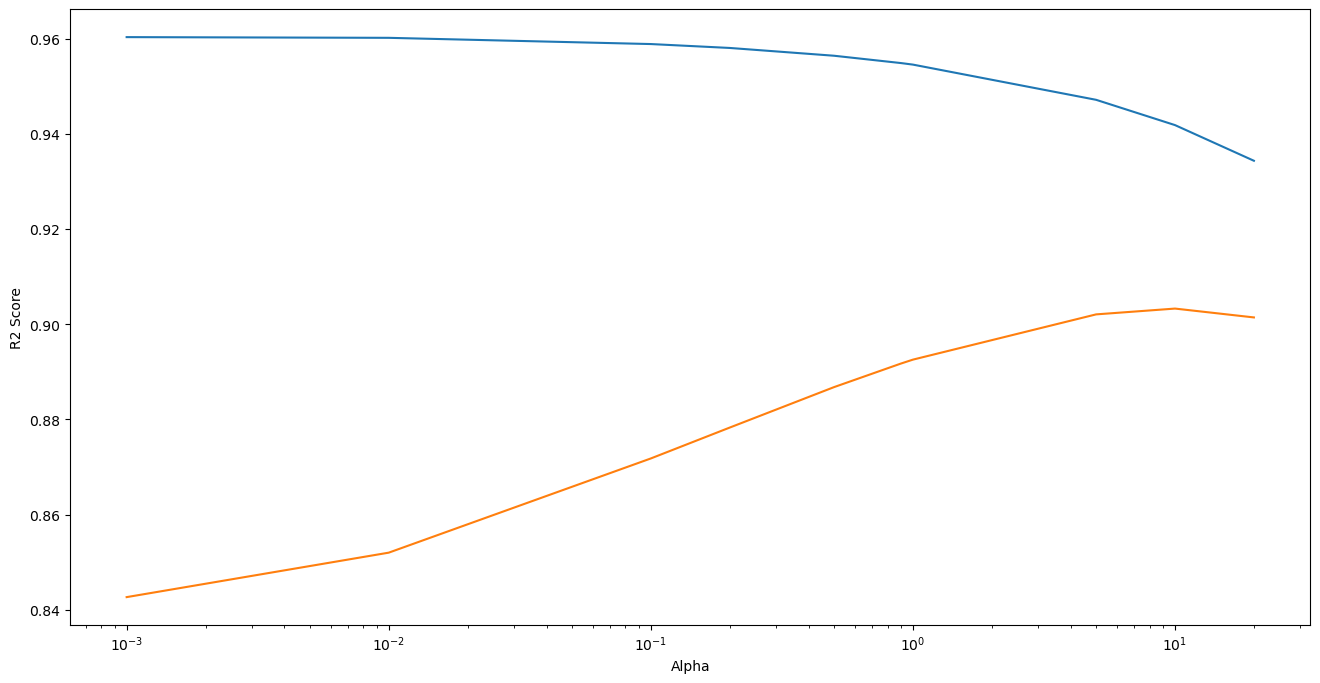

In [58]:
#Plot showing comparision of test and train score
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [59]:
#Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 10.0}

In [60]:
#After performing grid search we found the optimal alpha to be 20, so let's predict the test and train scores.
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9408485693669846
0.9241629008562992


In [61]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [62]:
#Significant variables which predict price of house when used ridge
ridge_coef.sort_values(by = 'Coef',ascending = False).head(10)

Feaure       Coef
0             LotFrontage  11.817884
12           BsmtFullBath   0.087911
123        OverallQual_10   0.081697
122         OverallQual_9   0.081178
71   Neighborhood_Edwards   0.076143
132       RoofStyle_Gable   0.070654
147    Exterior1st_CBlock   0.067258
237        FireplaceQu_Fa   0.067177
381  SaleCondition_Family   0.055125
99        Condition2_PosA   0.052011

In [63]:
#Final Model
#We have used lasso for building the model as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9210986203817577
0.9255893479304527


# Solving for subjective questions - Q1, Q3

# Q1

In [64]:
# Defining function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    #Create a list to save all metrics 
    metric = []
    
    #R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    #Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    #Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    #Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [65]:
#Building the ridge regression model with double value of alpha i.e. 20
ridge = Ridge(alpha=20)

#Fitting the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [66]:
#Predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [67]:
#Checking metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.93
R-Squared (Test) = 0.93
RSS (Train) = 8.34
RSS (Test) = 4.08
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [68]:
#Now we will be building the lasso model with double value of alpha i.e. 0.002
lasso = Lasso(alpha=0.002)

#Fitting the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [69]:
#Predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [70]:
#Checking the metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.91
RSS (Train) = 12.01
RSS (Test) = 4.81
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.11
RMSE (Test) = 0.10


In [71]:
#One more iteration of creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)          0.933940          0.904797
R2 Score (Test)           0.926256          0.912963
RSS (Train)               8.336792         12.014645
RSS (Test)                4.075941          4.810657
MSE (Train)               0.008157          0.011756
MSE (Test)                0.009306          0.010983
RMSE (Train)              0.090318          0.108425
RMSE (Test)               0.096467          0.104801

Changes in Ridge Regression metrics:

R2 score of train set decreased from 0.94 to 0.93
R2 score of test set remained same at 0.92

Changes in Lasso metrics:

R2 score of train set decreased from 0.92 to 0.90
R2 score of test set decreased from 0.92 to 0.91

In [72]:
#Now we see the changes in coefficients after regularization

#First creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, ...]

In [73]:
#Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [74]:
betas

Ridge     Lasso
LotFrontage            0.008046  0.003464
LotArea                0.021063  0.025757
YearRemodAdd           0.027525  0.036418
MasVnrArea            -0.001573 -0.000000
BsmtFinSF1             0.018191  0.029594
BsmtFinSF2             0.002431  0.000683
BsmtUnfSF             -0.009433 -0.000000
TotalBsmtSF            0.046036  0.041952
1stFlrSF               0.013577 -0.000000
2ndFlrSF               0.031044  0.003475
LowQualFinSF           0.000000  0.000000
GrLivArea              0.079620  0.108365
BsmtFullBath           0.005725  0.005003
BsmtHalfBath          -0.001537 -0.000000
FullBath               0.010979  0.000536
HalfBath               0.011270  0.005827
BedroomAbvGr           0.004750 -0.000000
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd          -0.000295 -0.000000
Fireplaces             0.021462  0.028665
GarageCars             0.023489  0.030354
GarageArea             0.012315  0.014531
WoodDeckSF             0.012241  0.011473
OpenPorchSF            0.008353  0.008890
EnclosedPorch          0.004170  0.001908
3SsnPorch              0.000000  0.000000
ScreenPorch            0.010623  0.010298
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                 0.001240  0.000000
Age                   -0.046587 -0.046247
MSSubClass_30         -0.025982 -0.000000
MSSubClass_40          0.003592  0.000000
MSSubClass_45          0.002381  0.000000
MSSubClass_50          0.000562  0.000000
MSSubClass_60         -0.001868  0.000000
MSSubClass_70          0.039945  0.008713
MSSubClass_75          0.019332  0.000000
MSSubClass_80         -0.001623  0.000000
MSSubClass_85          0.003010  0.000000
MSSubClass_90         -0.029231 -0.011396
MSSubClass_120         0.003437  0.000000
MSSubClass_160        -0.038140 -0.010133
MSSubClass_180        -0.006591 -0.000000
MSSubClass_190        -0.018586 -0.000000
MSZoning_FV            0.026548  0.000000
MSZoning_RH            0.005224 -0.000000
MSZoning_RL            0.016472  0.000000
MSZoning_RM           -0.026398 -0.037168
Street_Pave           -0.002193  0.000000
Alley_None            -0.009572 -0.000000
Alley_Pave             0.023952  0.000000
LotShape_IR2           0.015174  0.000000
LotShape_IR3          -0.016682 -0.000000
LotShape_Reg          -0.002670 -0.003418
LandContour_HLS        0.029169  0.000000
LandContour_Low        0.006981  0.000000
LandContour_Lvl        0.008566 -0.000000
Utilities_NoSeWa      -0.006769 -0.000000
LotConfig_CulDSac      0.021838  0.000000
LotConfig_FR2         -0.018342 -0.000000
LotConfig_FR3         -0.000411  0.000000
LotConfig_Inside      -0.001205  0.000000
LandSlope_Mod         -0.003050  0.000000
LandSlope_Sev          0.020632  0.000000
Neighborhood_Blueste  -0.002911 -0.000000
Neighborhood_BrDale    0.000327 -0.000000
Neighborhood_BrkSide   0.028345  0.003878
Neighborhood_ClearCr   0.021550  0.000000
Neighborhood_CollgCr  -0.013498 -0.000000
Neighborhood_Crawfor   0.063300  0.068771
Neighborhood_Edwards  -0.046753 -0.024574
Neighborhood_Gilbert  -0.011422 -0.000000
Neighborhood_IDOTRR    0.000474  0.000000
Neighborhood_MeadowV  -0.044525 -0.000000
Neighborhood_Mitchel  -0.020912 -0.000000
Neighborhood_NAmes    -0.027346 -0.000000
Neighborhood_NPkVill   0.006999  0.000000
Neighborhood_NWAmes   -0.013921 -0.000000
Neighborhood_NoRidge   0.009439  0.000000
Neighborhood_NridgHt   0.032766  0.000000
Neighborhood_OldTown  -0.022201 -0.000000
Neighborhood_SWISU    -0.001971  0.000000
Neighborhood_Sawyer   -0.014952 -0.000000
Neighborhood_SawyerW  -0.015974 -0.000000
Neighborhood_Somerst   0.029837  0.019016
Neighborhood_StoneBr   0.033524  0.000000
Neighborhood_Timber    0.010108  0.000000
Neighborhood_Veenker   0.013551  0.000000
Condition1_Feedr      -0.003939 -0.000000
Condition1_Norm        0.038603  0.036856
Condition1_PosA       -0.000559 -0.000000
Condition1_PosN        0.011178  0.000000
Condition1_RRAe       -0.019169 -0.000000
Condition1_RRAn        0.011143  0.0

Now, we look at the most important predictor variables after the change is implemented

In [75]:
#Viewing the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.079620
OverallQual_8           0.072876
OverallQual_9           0.065281
Neighborhood_Crawfor    0.063300
Functional_Typ          0.060990
Exterior1st_BrkFace     0.056309
OverallCond_9           0.049361
TotalBsmtSF             0.046036
OverallCond_7           0.044515
CentralAir_Y            0.043183
Name: Ridge, dtype: float64

In [76]:
#To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.082875
OverallQual_8           1.075597
OverallQual_9           1.067459
Neighborhood_Crawfor    1.065346
Functional_Typ          1.062888
Exterior1st_BrkFace     1.057924
OverallCond_9           1.050599
TotalBsmtSF             1.047112
OverallCond_7           1.045520
CentralAir_Y            1.044129
Name: Ridge, dtype: float64

In [77]:
#Viewing the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.108365
OverallQual_8           0.096017
OverallQual_9           0.086512
Functional_Typ          0.070960
Neighborhood_Crawfor    0.068771
Exterior1st_BrkFace     0.042244
TotalBsmtSF             0.041952
CentralAir_Y            0.037516
Condition1_Norm         0.036856
YearRemodAdd            0.036418
Name: Lasso, dtype: float64

In [78]:
#To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.114455
OverallQual_8           1.100778
OverallQual_9           1.090364
Functional_Typ          1.073538
Neighborhood_Crawfor    1.071191
Exterior1st_BrkFace     1.043149
TotalBsmtSF             1.042844
CentralAir_Y            1.038229
Condition1_Norm         1.037544
YearRemodAdd            1.037089
Name: Lasso, dtype: float64

The most important predictor variables after we double the alpha values are:-

GrLivArea

OverallQual_8

OverallQual_9

Functional_Typ

Neighborhood_Crawfor

Exterior1st_BrkFace

TotalBsmtSF

CentralAir_Y

Condition1_Norm 

YearRemodAdd  

# Q2, Q4 are available in pdf, as they are text answers, providing the solution of Q3 below

# Q3

In this question, we will drop top 5 features in Lasso model and rebuild the model

Top 5 Lasso predictors were: OverallQual_9, GrLivArea, OverallQual_8,Neighborhood_Crawfor and Functional_Typ

In [79]:
#Creating a list of top 5 lasso predictors that are to be removed
top5 = ['OverallQual_9', 'GrLivArea', 'OverallQual_8', 'Neighborhood_Crawfor', 'Functional_Typ']

In [80]:
#Dropping them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [81]:
#Now we will be creating a Lasso model
#We will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
#Viewing the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value

In [83]:
#Creating a lasso instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [84]:
#Fitting the model on training data
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=0.001)

In [85]:
#Predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [86]:
#Checking the metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.92
RSS (Train) = 11.09
RSS (Test) = 4.31
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


Now, we will find the top 5 predictors

In [87]:
#Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)          0.912149
R2 Score (Test)           0.922107
RSS (Train)              11.086827
RSS (Test)                4.305259
MSE (Train)               0.010848
MSE (Test)                0.009829
RMSE (Train)              0.104155
RMSE (Test)               0.099143

In [88]:
#Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)          0.912149
R2 Score (Test)           0.922107
RSS (Train)              11.086827
RSS (Test)                4.305259
MSE (Train)               0.010848
MSE (Test)                0.009829
RMSE (Train)              0.104155
RMSE (Test)               0.099143

In [89]:
#Now we see the changes in coefficients after regularization

#First creating empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_None, Alley_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, ...]

In [90]:
#Now we will fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Lasso'] = lasso.coef_
# betas['Lasso'] = lasso.coef_

In [91]:
#Viewing the betas/coefficients
betas 

Lasso
LotFrontage            0.006158
LotArea                0.022329
YearRemodAdd           0.028138
MasVnrArea             0.001372
BsmtFinSF1             0.027706
BsmtFinSF2             0.001663
BsmtUnfSF             -0.000000
TotalBsmtSF            0.050612
1stFlrSF               0.062758
2ndFlrSF               0.098555
LowQualFinSF           0.000000
BsmtFullBath           0.005615
BsmtHalfBath          -0.000000
FullBath               0.006817
HalfBath               0.010681
BedroomAbvGr           0.001414
KitchenAbvGr           0.000000
TotRmsAbvGrd           0.003134
Fireplaces             0.026773
GarageCars             0.028349
GarageArea             0.014293
WoodDeckSF             0.011436
OpenPorchSF            0.009174
EnclosedPorch          0.004352
3SsnPorch              0.000000
ScreenPorch            0.010442
PoolArea               0.000000
MiscVal                0.000000
MoSold                 0.001590
Age                   -0.050028
MSSubClass_30         -0.000000
MSSubClass_40          0.000000
MSSubClass_45          0.000000
MSSubClass_50          0.000000
MSSubClass_60         -0.000000
MSSubClass_70          0.062891
MSSubClass_75          0.000000
MSSubClass_80          0.000000
MSSubClass_85         -0.000000
MSSubClass_90         -0.012470
MSSubClass_120         0.000000
MSSubClass_160        -0.064818
MSSubClass_180        -0.000000
MSSubClass_190        -0.000000
MSZoning_FV            0.000000
MSZoning_RH           -0.000000
MSZoning_RL            0.000000
MSZoning_RM           -0.051990
Street_Pave            0.000000
Alley_None            -0.000000
Alley_Pave             0.003089
LotShape_IR2           0.000000
LotShape_IR3          -0.000000
LotShape_Reg          -0.001636
LandContour_HLS        0.032613
LandContour_Low        0.000000
LandContour_Lvl       -0.000000
Utilities_NoSeWa      -0.000000
LotConfig_CulDSac      0.013679
LotConfig_FR2         -0.000000
LotConfig_FR3          0.000000
LotConfig_Inside       0.000000
LandSlope_Mod          0.000000
LandSlope_Sev          0.000000
Neighborhood_Blueste  -0.000000
Neighborhood_BrDale   -0.000000
Neighborhood_BrkSide   0.011712
Neighborhood_ClearCr   0.000000
Neighborhood_CollgCr  -0.000000
Neighborhood_Edwards  -0.047840
Neighborhood_Gilbert  -0.000000
Neighborhood_IDOTRR   -0.000000
Neighborhood_MeadowV  -0.017273
Neighborhood_Mitchel  -0.000000
Neighborhood_NAmes    -0.022048
Neighborhood_NPkVill   0.000000
Neighborhood_NWAmes   -0.000000
Neighborhood_NoRidge   0.000000
Neighborhood_NridgHt   0.049812
Neighborhood_OldTown  -0.018389
Neighborhood_SWISU     0.000000
Neighborhood_Sawyer   -0.000000
Neighborhood_SawyerW  -0.000000
Neighborhood_Somerst   0.056196
Neighborhood_StoneBr   0.047367
Neighborhood_Timber    0.000000
Neighborhood_Veenker   0.000000
Condition1_Feedr      -0.000000
Condition1_Norm        0.042766
Condition1_PosA        0.000000
Condition1_PosN        0.000000
Condition1_RRAe       -0.000000
Condition1_RRAn        0.000000
Condition1_RRNe        0.000000
Condition1_RRNn        0.000000
Condition2_Feedr      -0.000000
Condition2_Norm        0.029252
Condition2_PosA        0.000000
Condition2_PosN       -0.000000
Condition2_RRAe       -0.000000
Condition2_RRAn       -0.000000
Condition2_RRNn        0.000000
BldgType_2fmCon       -0.000000
BldgType_Duplex       -0.027019
BldgType_Twnhs        -0.001523
BldgType_TwnhsE       -0.000000
HouseStyle_1.5Unf      0.000000
HouseStyle_1Story     -0.000000
HouseStyle_2.5Fin      0.000000
HouseStyle_2.5Unf     -0.000000
HouseStyle_2Story     -0.022780
HouseStyle_SFoyer     -0.000000
HouseStyle_SLvl        0.000000
OverallQual_2         -0.000000
OverallQual_3         -0.082365
OverallQual_4         -0.109567
OverallQual_5         -0.083503
OverallQual_6         -0.045484
OverallQual_7         -0.014900
OverallQual_10        -0.035210
OverallCond_2         -0.000000
OverallCond_3         -0.094065
OverallCond_4         -0.055520
OverallCond_5         -0.039757
OverallCond_6          0.0

Now, we will look at the top 5 features significant in predicting the value of a house according to the new lasso model

In [92]:
#Viewing the top 5 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:5]

2ndFlrSF                0.098555
Exterior1st_BrkFace     0.092322
MSSubClass_70           0.062891
1stFlrSF                0.062758
Neighborhood_Somerst    0.056196
Name: Lasso, dtype: float64

After dropping our top 5 lasso predictors, we get the following new top 5 predictors:-

2ndFlrSF

Functional_Typ

1stFlrSF

MSSubClass_70

Neighborhood_Somerst